In [2]:
#TODO: decide whether to use pandas or networkx
# we're using networkx for now

import networkx as nx
import matplotlib.pyplot as plt
import csv

In [24]:
def createNxGraph(filename):
    G = nx.Graph()
    with open(filename, 'r') as inputfile:
        csvr = csv.reader(inputfile, delimiter=',')
        next(csvr) # we don't want to read the header, so we skip it
        for line in csvr:
            # we add an edge between the ID of the proposition
            # and the ID of the MEPf
            G.add_node(line[0], bipartite = 0)
            G.add_node((line[6], line[7],line[8],line[9],line[10]), bipartite = 1)
            G.add_edge(line[0], (line[6], line[7],line[8],line[9],line[10]))
    return G

def listMEPs(filename):
    L = []
    with open(filename, 'r') as inputfile:
        csvr = csv.reader(inputfile, delimiter=',')
        next(csvr) # we don't want to read the header, so we skip it
        for line in csvr:
            L.append((line[6], line[7],line[8],line[9],line[10]))
    return L

In [25]:
myGraph = createNxGraph("db/ep_cosponsorship_dataset.csv")
list_meps = listMEPs("db/ep_cosponsorship_dataset.csv")

In [26]:
print(f"Some information about this graph:\n"
        f"Number of nodes: {nx.number_of_nodes(myGraph)}\n"
        f"Number of edges: {nx.number_of_edges(myGraph)}\n")

print(f"The nodes in this graph include: {myGraph.nodes}")

Some information about this graph:
Number of nodes: 259404
Number of edges: 750578

The nodes in this graph include: ['892323', ('124704', 'Stanislav POLČÁK', 'Czechia', 'EPP', 'Mayors and Independents'), '880086', ('197572', 'Anna ZALEWSKA', 'Poland', 'ECR', 'Law and Justice'), '885326', ('94649', 'Catherine GRISET', 'France', 'ID', 'National Rally'), '891589', ('96725', 'Bas EICKHOUT', 'Netherlands', 'Greens/EFA', 'GreenLeft'), '881777', ('197770', 'Martin HOJSÍK', 'Slovakia', 'RE', 'Progressive Slovakia'), '888406', ('113892', 'Eric ANDRIEU', 'France', 'S&D', 'Socialist Party'), '890457', ('96711', 'Pascal CANFIN', 'France', 'RE', 'The Republic Forward'), '894926', '893171', '892450', '894881', '893914', '893108', ('37324', 'Adina-Ioana VĂLEAN', 'Romania', 'EPP', 'National Liberal Party'), '894291', '883936', ('197721', 'César LUENA', 'Spain', 'S&D', "Spanish Socialist Workers' Party"), ('197719', 'Cristina MAESTRE MARTÍN DE ALMAGRO', 'Spain', 'S&D', "Spanish Socialist Workers' Part

In [27]:
nx.is_bipartite(myGraph)

True

In [30]:
# nekem fogalmam sincs hogy ez miért nem működik
# ezer évig fut for some reason
mep_social_network = nx.algorithms.bipartite.projected_graph(myGraph, list_meps)

KeyboardInterrupt: 

In [17]:
deg_hist = nx.degree_histogram(myGraph)
deg_hist


[0,
 134301,
 32769,
 20867,
 16829,
 13585,
 9801,
 8116,
 5790,
 4525,
 3261,
 2349,
 1982,
 1371,
 780,
 829,
 461,
 361,
 182,
 131,
 86,
 52,
 71,
 55,
 84,
 6,
 4,
 0,
 8,
 2,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 3,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1

In [19]:
degs = dict(myGraph.degree())

sorted_nodes = sorted(degs.items(), key=lambda x: x[1], reverse=True)
sorted_nodes[:10]

[(('197463', 'Olivier CHASTEL', 'Belgium', 'RE', 'Reformist Movement'), 5155),
 (('197702',
   'Lina GÁLVEZ MUÑOZ',
   'Spain',
   'S&D',
   "Spanish Socialist Workers' Party"),
  4483),
 (('202073',
   'Marc ANGEL',
   'Luxembourg',
   'S&D',
   "Luxembourg Socialist Worker's Party"),
  4350),
 (('197635',
   'Maria-Manuel LEITÃO-MARQUES',
   'Portugal',
   'S&D',
   'Socialist Party'),
  4245),
 (('124785',
   'Maria GRAPINI',
   'Romania',
   'S&D',
   'Social Liberal Humanist Party'),
  3953),
 (('58766', 'Nicolae ŞTEFĂNUȚĂ', 'Romania', 'RE', 'Save Romania Party'), 3914),
 (('197446', 'Milan BRGLEZ', 'Slovenia', 'S&D', 'Social Democrats'), 3650),
 (('134605', 'Ramona STRUGARIU', 'Romania', 'RE', 'Save Romania Party'), 3544),
 (('197732', 'Manuel PIZARRO', 'Portugal', 'S&D', 'Socialist Party'), 3533),
 (('197663', 'Dragoș PÎSLARU', 'Romania', 'RE', 'Save Romania Party'), 3491)]

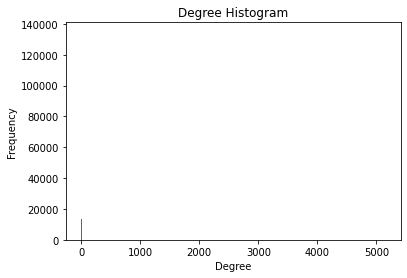

In [18]:
plt.bar(range(len(deg_hist)), deg_hist, align='center')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [21]:
### melyik ország politikusai csináltak többet?

contribs_by_country = {}

for person in myGraph.nodes():
    if person[2] not in contribs_by_country:
        contribs_by_country[person[2]] = 0
    print(person)
    #contribs_by_country[person[2]] += person.degree

contribs_by_country

892323
('124704', 'Stanislav POLČÁK', 'Czechia', 'EPP', 'Mayors and Independents')
880086
('197572', 'Anna ZALEWSKA', 'Poland', 'ECR', 'Law and Justice')
885326
('94649', 'Catherine GRISET', 'France', 'ID', 'National Rally')
891589
('96725', 'Bas EICKHOUT', 'Netherlands', 'Greens/EFA', 'GreenLeft')
881777
('197770', 'Martin HOJSÍK', 'Slovakia', 'RE', 'Progressive Slovakia')
888406
('113892', 'Eric ANDRIEU', 'France', 'S&D', 'Socialist Party')
890457
('96711', 'Pascal CANFIN', 'France', 'RE', 'The Republic Forward')
894926
893171
892450
894881
893914
893108
('37324', 'Adina-Ioana VĂLEAN', 'Romania', 'EPP', 'National Liberal Party')
894291
883936
('197721', 'César LUENA', 'Spain', 'S&D', "Spanish Socialist Workers' Party")
('197719', 'Cristina MAESTRE MARTÍN DE ALMAGRO', 'Spain', 'S&D', "Spanish Socialist Workers' Party")
('125042', 'Javi LÓPEZ', 'Spain', 'S&D', "Socialists' Party of Catalonia")
('197718', 'Nicolás GONZÁLEZ CASARES', 'Spain', 'S&D', "Spanish Socialist Workers' Party")
88

885005
883645
893467
881708
891465
892525
881773
888840
890372
895523
888904
889853
895304
884560
887917
882534
882380
895049
885530
886529
883416
894550
879676
883997
887936
892693
889223
887585
879655
886223
894402
879709
886281
894454
882204
886947
894497
882255
880234
885986
885594
890818
887638
884342
887968
894820
893656
890376
894980
885562
881795
888791
889540
887899
893023
884584
889336
894572
886789
889383
882085
886845
881695
886908
896434
883605
889508
881674
882728
881729
885533
889831
881774
890428
888531
890866
882951
886300
893682
883010
886966
894523
886866
890633
890238
886008
889046
('197514', 'Andrzej HALICKI', 'Poland', 'EPP', 'Civic Platform')
882047
885428
890578
885013
893702
884551
884499
889296
880283
890395
886058
890184
892586
895055
893371
895106
887987
881043
895391
892415
890658
881086
895443
881131
895507
890709
882452
895776
887434
890596
885046
887485
891283
888361
891558
887355
889071
891326
886727
889358
881071
895480
895164
888820
881446
886131
8923

893422
880421
888841
890869
881750
888016
886669
889616
889841
886632
887042
886019
883908
891365
885975
891293
882087
891551
893442
882007
891491
891647
895537
890333
891581
889927
882044
895505
886469
882283
895454
887934
881471
895117
892669
883390
883954
891858
881381
891014
891319
880395
890986
891527
890607
888380
891621
891244
889021
888969
882310
895225
890269
889672
881174
895152
885272
886093
892694
880122
895093
891870
881412
895819
890655
880407
891009
888677
890642
887525
881966
887472
881890
887386
893937
881836
887315
895833
880868
894310
880154
893813
894229
893316
881113
893246
885694
895789
889707
884878
895728
882619
883467
892886
881933
879617
879569
893851
882272
894571
882200
894798
883414
885314
885494
893635
882716
884221
888651
884443
879574
879517
884390
890136
882049
890137
892101
881996
879646
880078
885705
896044
882176
883718
889245
887637
896274
880863
887593
890863
896529
884605
887102
896476
889769
883782
879719
885168
886107
886970
882132
894582
889976

893217
888410
888385
895749
895554
887303
880167
896522
880216
888321
891739
880198
888304
890790
886173
887137
889645
886222
888634
881576
882846
888755
882273
887268
892823
883564
887336
896356
879941
880950
893861
884113
896439
880109
894058
896188
884813
889100
896320
885699
887169
881506
885755
888186
880866
889283
880989
884155
892840
889398
891937
886844
894094
891992
887709
893134
894915
886913
892190
889534
894968
893660
880743
893708
885625
887035
889318
890922
879949
889295
891063
886816
891112
880485
888090
883046
885880
892236
883865
885922
894627
894594
880457
894399
880512
888542
890920
887677
895476
887608
889840
885653
885452
890536
882514
887044
884676
882460
882671
892104
883029
883679
891554
890335
891292
881267
891389
879678
892356
894459
886624
894499
895362
895426
887575
885784
886022
882703
893448
888879
891323
881435
888833
889939
888884
881258
890240
885527
886054
894241
888980
884556
889058
884937
895291
881982
895243
893362
887873
882039
895818
891688
880406

891469
881227
886106
890667
896523
893307
884953
887632
896571
888325
890322
879755
891183
892380
879700
885209
879650
890724
886304
885155
883846
891781
882552
886113
884301
888496
891456
887660
891546
889643
896559
885030
889010
887382
892880
892791
889092
879753
882835
885208
889625
881375
881388
882477
881467
887276
888479
896204
888495
896524
884874
890651
884120
892778
881822
881604
888220
893617
882841
884119
893748
880103
888197
892288
893542
881608
883512
884215
895665
883435
896575
892808
880818
889208
893476
879534
892172
889767
885210
892000
893771
891948
885145
883527
881536
892551
889587
893041
880527
880418
890936
886665
887999
887704
890393
890185
892510
895004
894994
886616
892567
895045
895092
889583
893035
888817
888674
885354
888734
889686
882788
885289
887473
896294
881029
887592
896532
885830
896478
884623
883783
888280
891005
895722
891748
895616
884371
881182
895660
892699
883441
892648
884413
888778
879885
885345
892008
880661
888413
891934
882743
888375
879526

885217
893341
888572
891142
893334
888556
880508
891851
884293
894922
887955
883470
886379
883017
887923
885255
891903
891047
887036
889280
883248
892759
889266
894963
882106
894231
884124
882019
894008
884231
883358
889030
884150
886485
884806
894948
887956
885288
896170
888917
886404
891076
888860
881400
892802
889297
880416
893564
882803
884955
893514
884133
884933
889055
886210
886051
884841
896416
888972
894435
890284
884826
896209
891576
880115
888894
881789
896528
883674
886456
885118
892774
886553
883047
890424
888506
896582
883736
889117
883803
889188
879693
886266
879767
889238
894494
883041
885184
894142
883539
887066
894603
881003
890339
896543
887689
894666
883658
885884
888564
881765
883011
893728
885598
889414
880448
885642
885396
887075
890870
882953
894623
883628
884641
890910
886969
890469
887016
894577
889877
895185
883219
883672
888560
883257
887733
880435
887775
894817
887975
893688
891620
894867
886519
892931
884586
884834
891518
894518
('96842', 'Ismail ERTUG', '

885532
887877
883952
883397
891375
882551
885388
891289
890142
882058
892108
881971
891429
890643
895459
888423
891486
891634
891240
888976
882307
890245
881143
895112
891882
882413
881450
881367
890163
895037
891811
890046
891853
891011
889969
880366
887496
890534
891210
887854
881821
887294
882327
894314
888996
887345
880155
895134
887193
880474
892724
883172
886389
885227
887785
888497
888462
883337
892292
885386
881917
892269
886806
890579
893057
886885
890404
894102
890476
893400
880797
893370
895129
880874
893674
881538
886766
881652
885487
890612
889211
889975
885520
879726
893853
895155
882146
891301
894057
880076
891349
886100
883573
881561
889116
893412
895467
885829
895445
890660
887089
895520
890712
879651
890774
889227
891381
879759
891325
885224
881207
886976
886109
883542
887028
888439
892397
887698
891182
893233
893278
888593
881790
880446
892701
884357
894828
886478
886584
888028
884400
883013
885280
891070
889906
883893
891177
889882
883224
893994
888535
883268
883205

888141
894616
881291
893654
('28288', 'Jan OLBRYCHT', 'Poland', 'EPP', 'Civic Platform')
884016
885636
882920
893736
883711
882933
886447
894910
884658
896286
889412
889473
896312
894184
880074
880063
890351
894585
882806
880944
894669
882890
893144
881338
882897
882903
888245
886194
891933
887126
885687
883578
892014
889115
879806
896258
889196
879887
896365
884235
880734
896375
884254
895656
882257
883149
893119
884798
892393
893126
886155
892473
893194
886240
891979
880639
884670
887159
897206
897021
897062
896823
897205
897053
897020
896785
897044
896773
897005
896719
897247
897017
897244
896779
897255
896919
896721
897258
896623
896854
896921
896630
897241
896958
896955
896631
896814
896629
897195
896862
897079
896863
897198
897082
897013
897151
897071
897041
896711
897234
896960
896850
896714
896945
897153
897276
896707
896937
896625
896661
897275
896933
897073
897036
896844
897192
896653
897069
897130
897072
897033
897109
897029
896709
897031
896747
897272
897266
896641
896879
8

899217
899694
900954
900783
899534
900243
899263
899225
899870
899866
900792
899196
900090
900733
899512
900949
900777
899170
900957
900789
899224
899885
899302
899290
899231
899924
900215
899304
899680
899354
900389
899654
899210
899897
900722
899469
899317
900189
900329
900844
899864
899326
900917
900736
900227
899656
899834
899053
899288
900235
899633
899665
899490
900649
899788
900252
900688
899830
899673
899494
900932
899716
899055
899543
898953
900306
900945
899247
900550
900766
899101
900055
899555
900989
900161
900771
899204
900249
900991
900537
899861
901044
899907
899363
900230
899919
899334
900405
899709
899340
899710
899389
898931
899538
900420
899685
899548
900982
898830
899587
900988
900530
899564
901037
900586
899252
901007
900588
899731
899956
900560
898893
900846
899744
899965
899372
899749
899969
899379
899022
900417
899012
900015
900126
900424
899430
898825
900324
900684
900468
899160
900119
898833
898964
900203
899561
900481
898876
901049
899465
899596
900907
900702

904187
902083
904930
901439
903526
904164
902067
904744
901183
901456
902494
901965
901665
904905
904723
901415
901502
902357
902361
904470
901249
904180
902347
904508
901938
903039
901897
903854
904899
901448
901197
904549
901425
902058
903826
903846
903052
901690
903216
904949
903037
901671
902138
903644
904814
902222
902336
904471
903234
902241
901811
901905
901789
901877
904372
903190
902673
901854
904593
903010
902515
904852
902148
904337
903720
902960
904401
902502
902126
901524
904307
901779
903206
904328
902189
902459
903702
903155
901883
902443
903135
902702
904349
903119
902678
901963
903491
903629
903575
903474
902852
901532
903317
902151
902624
903454
902866
902371
903435
903981
902412
903994
902861
902429
901989
901164
904030
903341
903948
903607
903621
903320
902799
902234
903343
902422
903462
903089
902122
903530
('197835', 'Aušra MALDEIKIENĖ', 'Lithuania', 'EPP', 'Independent')
902637
903632
902410
903992
902305
902345
904507
901895
903853
904499
904591
901950
903834
90

903478
902183
902332
903661
902134
903121
902274
902402
903115
901945
901995
902400
903188
901961
904343
903205
903103
903096
902539
903449
902228
902490
903464
902245
902276
902407
903199
902484
903945
902676
902287
903217
901982
902480
904365
903700
903962
902690
903683
902562
903274
903675
902716
903298
902573
903531
903751
902753
902617
903482
902812
902635
903549
902279
902489
903572
902845
901082
903972
902700
901092
903991
903278
903984
902766
903373
903756
903351
903733
902718
902627
903382
903766
902917
901151
902644
903555
904110
901566
902822
903554
904575
901686
901582
904669
902895
901071
904680
904039
902926
901162
902781
904054
901174
904049
903792
904150
904432
902788
904114
901588
903376
904140
901269
903802
904167
901602
904686
902898
901600
901213
904740
902953
901808
904234
901141
904693
903932
902938
901251
904449
903864
904771
901385
901711
904518
901495
901795
904469
901349
904545
901873
903869
901355
904274
902996
903891
901659
903024
902967
902082
904863
901481

909479
906655
908513
909539
907006
908566
909515
906987
908790
910139
906984
908778
906661
906723
910279
907034
907521
910255
908625
908817
907098
908618
909034
907085
908660
909073
908648
909065
909056
906702
909714
910147
906750
909706
910203
907047
908172
908824
907102
908232
908889
907093
908667
910041
907136
908654
909080
907212
908725
909901
906710
910464
909883
906755
909793
909877
906752
909776
906814
907886
909742
906794
908240
909820
906867
908217
906844
910048
908266
910101
907141
908263
910087
908356
910475
910071
908339
910544
906470
908400
910529
906523
907895
910573
906510
907890
909827
906879
909103
909807
906850
908280
910356
908012
908270
910095
906582
908064
909261
906310
908348
909254
906307
908407
910606
906291
908382
910582
906592
908455
910577
909105
910637
907719
909090
910370
907709
909152
907271
907998
909137
907260
908133
909255
907245
908119
910374
906373
908105
909381
906430
909547
910428
906415
907584
909183
908440
910644
907731
909644
910626
907717
909160

912085
912182
917914
919989
920176
911965
915521
915804
920225
916989
916626
916682
919060
914838
917035
910601
907764
907974
907326
907823
907957
910012
907295
906349
908308
906388
908038
906366
908322
909648
910433
910647
906331
906497
909634
910613
907995
907779
907315
908046
908032
910446
909464
907279
910426
906347
909446
908584
906597
909546
908594
906575
906769
909281
908910
908404
909272
908920
910345
906757
907109
910547
909050
908399
907878
910527
909039
907903
908742
910317
906857
907855
910372
906587
907863
910627
910291
906467
909144
909844
906486
909155
908140
907971
909836
909247
908299
908122
908397
908751
908127
909257
908305
906377
906425
908317
908740
908367
910639
906502
910556
908969
908568
906849
908152
910104
906763
907053
910084
907128
909263
910078
906865
908165
909780
909869
907894
908599
910122
907944
907641
909888
906623
906643
910537
909041
906634
910204
907661
908799
907214
907651
909898
907121
906724
907645
909895
906714
908499
910154
909786
906925
909768

915504
920116
916026
910815
920219
911241
916939
914921
911210
914678
919002
911306
915571
919106
912483
914647
918990
912531
916438
919056
916563
917882
914950
920133
916494
910803
920274
916960
917992
911696
912251
920354
918946
911314
915587
918105
917638
913031
913584
917548
911703
919072
913549
916138
918617
911811
911896
917421
916173
915029
917454
919732
915492
916522
912024
919273
907522
906614
909800
910143
910116
907917
909740
908226
908569
906894
908210
908170
906840
918005
914447
917036
917607
914526
915543
913076
916204
917524
913054
914914
915457
913059
914936
918573
910836
914899
918548
910802
920596
920514
917374
910737
917986
913820
920333
917015
914430
920357
912064
913606
913871
915572
912040
913569
919758
911788
913501
919441
911912
918682
918302
911873
918436
917444
915328
917189
917389
917160
913347
913834
912181
920326
912992
920786
916716
919744
912012
913551
920905
910914
910869
916677
918740
918670
916306
916629
915309
917163
912730
915277
917133
912241
913982

912589
918073
912951
919939
918010
913489
919913
915977
914415
912777
915991
914429
918688
911413
918752
917259
911350
915378
915429
911642
920275
915483
911687
920016
918093
912267
919980
918130
917596
918022
911284
911245
917647
911176
918280
916156
918250
918621
919000
916183
915567
911169
914579
914625
919010
911238
914634
919018
910830
915589
918222
915478
919097
912541
915491
914906
920067
916497
910838
920231
916983
920595
919730
911544
919195
916639
916397
919868
911195
918836
915988
916468
918397
918526
918484
914103
912865
918426
911100
913852
911130
913873
912118
920644
913180
913899
915704
919755
912232
914828
914083
916679
911516
918407
915198
915250
919570
915050
911111
915276
919163
920673
911980
915794
914566
920863
912007
913282
914854
920830
913385
915824
920887
913274
913285
915887
912705
911532
915229
917816
913642
912803
916342
913350
916411
919652
915076
913363
916751
919705
913409
915864
912816
915137
912690
914360
915879
912701
917352
914641
914254
916857
919856

920078
916909
918872
911160
914643
916076
911267
918263
912326
912441
915533
912454
918209
915631
919558
915458
919544
912535
910713
916503
917963
916466
910761
920226
916567
920197
917037
911768
920153
917009
912335
920282
916981
912307
917520
919044
913527
915634
919553
914885
914560
915772
913825
920778
912637
919741
914099
911464
911399
918443
913809
917898
917459
916655
911524
912968
919751
911973
920638
919211
912196
918297
913854
910979
920645
915343
919144
911039
915289
919265
913341
913332
914754
920819
915812
913245
914821
920929
913239
916676
912667
914126
916625
911542
914256
917719
911535
915316
917738
918800
912736
916356
916365
919234
920520
920521
913469
916837
919677
915948
914149
915833
919633
916851
913416
915959
912572
913414
912693
915056
919897
915186
918820
912752
915144
911319
918918
913666
916374
914586
918915
917269
919651
914364
913766
918151
918139
914313
912484
915363
916840
919916
916430
915160
916065
917878
919866
914701
910829
918759
919982
918938
914603

910890
920928
912983
912029
920803
913012
911994
917038
913943
912202
913835
917102
913815
917511
917519
915265
917366
919147
911962
911903
919433
918326
913023
919468
913517
911810
919463
913509
920284
918678
917993
913550
912756
920346
922265
922757
921076
921088
921376
922197
923026
922213
923480
922157
922608
922116
923440
922169
921470
921436
922670
923109
921486
922676
921061
921607
923391
921501
922680
921745
922172
922689
921716
922184
923053
921768
923059
923023
923435
923076
921675
923438
922170
921638
923498
921120
921495
923460
921122
922728
921091
922338
922742
922741
921761
922226
921765
922190
923374
921834
922201
923078
921670
922254
921872
921632
923490
921881
921698
923546
923519
921118
921702
923506
921177
922252
923175
922331
921138
922389
922783
921143
923352
921829
922350
922761
921833
922454
921247
921878
921854
922313
921281
921921
921694
922278
921936
922839
923566
921900
922841
923570
921187
922432
923582
921198
922396
922403
921241
923167
921255
921848
922309

925070
924824
924842
924725
924825
924843
924723
925211
924854
924716
925213
925236
924957
925140
925240
924964
925065
925242
924974
925018
924968
925023
924821
925076
924826
925077
925025
924851
925027
924827
924856
924728
924762
924858
924731
925142
924866
924730
925141
925246
925080
925034
924743
925147
925241
924972
925151
925252
924977
925079
925253
924979
925035
925082
924978
924864
924759
924862
925029
924761
924741
924766
924868
924744
925149
924870
924754
925148
925249
924753
924913
925161
925260
924976
925164
925262
924911
925084
925268
925039
925094
924882
925166
925037
924772
925103
925041
924763
924878
925054
924776
924873
924755
924783
924684
924883
924683
925180
925276
924685
925168
925271
925282
924923
925099
924926
925105
925052
924918
925107
925056
924780
925115
924897
924694
925055
924777
924879
924992
924795
924681
924881
925198
924799
924696
924898
925110
924942
925187
925293
924695
924700
925199
925185
925284
924997
924931
925224
924994
925120
924996
924796
925119

926326
927362
925453
926372
927369
925770
926361
927401
925844
926643
925814
927391
925828
927622
927070
927141
925374
926689
927148
925377
926730
925942
925414
926725
925469
925442
926791
925451
926352
926780
925527
927459
927387
925530
925880
927461
927428
927495
927423
925873
927665
926103
926402
925851
927647
925939
926860
927687
925927
925435
926765
925968
925438
926795
925502
926749
925488
927279
926152
925766
926714
926879
926642
926705
927282
925759
926146
926742
926245
926065
927210
926001
927572
926048
926433
925456
926474
926053
926487
925820
926680
926489
925829
926684
927567
925890
927615
927579
926148
926149
926752
925483
926200
926768
925492
926046
926776
925495
927024
926483
925512
926998
926530
925869
927005
926534
925884
927656
927411
925895
927660
926238
925899
926252
927668
926195
927685
926301
926196
926766
926303
927317
926829
927157
926815
925505
926826
925545
927036
925557
927045
925298
927055
925301
926863
927706
926875
925353
925905
927718
926295
927722
926297

928905
929019
928152
929401
928691
929287
929016
928704
929297
929411
928616
929303
929394
928657
928633
928431
928165
928071
928156
928426
928888
928168
929149
928894
929010
929127
929661
928936
928708
928914
928942
929306
928749
928939
928740
928336
929417
928753
928343
929423
928075
928376
929432
928550
928178
929823
928587
928188
929145
928581
928092
929156
928635
929232
929087
928799
928768
929629
928450
927895
928801
929636
927867
928810
929032
927905
928313
929043
929176
928720
928078
929353
929293
928679
928573
928875
929034
929172
928412
929614
929288
927932
928876
928391
929522
929455
928094
929493
929234
929829
928126
928040
927817
928422
929385
929803
928091
928760
928729
928682
929778
928922
928147
928276
928861
928607
927859
928881
929436
929061
928362
928034
929809
929341
929588
928744
927894
928782
928732
928967
929841
929448
928348
929361
928909
929806
929487
928807
929371
928856
927809
929159
928136
928859
928459
929515
929167
928311
927881
928141
927783
927799
928854

932489
932751
931335
932520
931474
931249
931531
932709
932705
931651
931247
931530
931734
932382
932985
931724
932005
933010
932754
931643
932053
931854
931330
932657
931206
932622
932207
932913
932334
930963
930882
932330
931836
930974
932065
931725
931940
931373
931722
931412
931758
931840
931055
931401
932964
931008
932332
931552
933084
930965
931039
932056
932149
931826
931138
932320
932601
931130
932597
932312
932415
932578
932481
932151
931790
932919
932480
932141
931891
932210
932920
931917
931467
931143
931456
931660
932313
932111
931102
931654
931098
932422
932590
931086
932412
932581
932485
932375
932482
932580
932682
932437
932135
931884
932433
931220
931882
931462
931212
931871
932301
931629
931866
932300
931624
931969
932290
931645
931964
932372
931747
931995
932367
932536
931752
932688
931945
931532
932678
932440
931222
932634
931217
931874
932528
931170
932762
932303
931168
932755
932257
932747
932251
931751
931361
931154
931744
931950
931502
931695
932043
931534
932641

935168
933753
935217
935622
933720
935231
934487
935435
934522
933236
934704
934712
933309
934089
933222
935787
934075
933510
935776
934061
934934
934895
936092
934045
935839
934208
935597
933856
934944
933213
935772
935615
933862
935000
933952
935184
934275
933845
933607
935178
933328
933831
935883
935288
934598
933314
935922
933252
933624
934609
934617
935740
934149
934585
935729
935276
934886
933618
934175
934270
933836
934873
934117
934856
934254
933806
935847
935904
934212
935887
933267
935061
935866
934612
933256
935256
934571
934358
934535
934797
934344
935375
934949
934191
935815
935497
935054
935012
935871
934360
934982
933937
933381
935715
933923
933365
935700
933597
935348
934407
935709
933611
935799
934677
935381
934634
934453
933899
935456
934642
933594
935466
933192
933658
936053
933206
933617
935331
933523
933630
935294
934828
935635
935303
934838
935643
935050
933413
936067
935064
933894
936082
933827
933901
935459
933191
934795
935333
933959
934389
933197
936078
933616

936365
937562
936368
938306
937560
938297
936621
936399
938280
936611
937317
938315
936640
937302
936197
937596
938173
938181
937177
934700
935685
934168
933837
935911
934822
935448
935115
933336
933666
936036
933279
934601
936042
933284
934637
935085
934338
934629
935940
934551
933786
935147
934844
933773
933998
935829
934252
934013
935860
934186
935848
934756
934230
934742
935404
935504
934778
933404
935387
934717
934554
934104
934340
934001
934569
934112
935511
934290
933358
933787
934022
935684
933729
935855
934218
935811
935655
935802
('183338', 'Jakop G. DALUNDE', 'Sweden', 'Greens/EFA', 'Green Party')
935507
934055
934738
934077
934716
934100
933388
933350
935762
933168
934046
934445
933715
935212
935205
935806
933744
934435
935682
934955
935192
933851
935173
935665
934962
933465
933449
933405
935159
933846
934383
934306
935926
933453
934293
935781
933441
935566
935769
934438
934044
934785
935040
934430
935677
934837
934162
934377
933182
935890
933162
933816
933120
935433
933108

940196
940826
939553
941267
939637
940371
939627
939043
938485
940844
939016
940914
939076
939011
938950
940905
939026
940212
940505
939519
939296
939272
939853
940816
940539
939510
939830
939544
939814
938505
940907
939779
939743
939702
940497
940662
940129
940453
940674
940140
938752
940291
939290
940148
938759
939246
938722
939254
940260
939809
940614
939598
941135
939403
939775
939738
939608
939924
939749
940490
939659
939670
939356
939124
940989
939368
939085
940999
938715
940752
940961
938724
940606
940219
939953
940616
939320
939603
938834
940577
938612
941130
940544
938623
939888
940315
938580
939899
940322
940779
940328
939326
940745
939949
940955
939332
940754
940216
940713
940224
938914
938616
938829
940573
938800
940581
941092
938574
939895
941101
938536
941245
941207
940296
939460
941166
940302
940359
940708
938430
939435
940716
941055
938909
939409
938919
941060
938874
938806
941017
938880
940020
941094
938460
939482
938888
940028
940654
941249
941066
939475
941159
941174

941756
942126
943235
941416
942116
943225
942385
942188
943521
942380
942133
943479
942366
942409
942314
942051
943246
942739
942024
943280
941979
942728
942763
943422
943534
942212
941948
942644
942164
941967
942562
941747
941912
941681
942030
943130
943228
942308
942048
942079
943140
942784
943244
942794
942777
941863
941870
942602
942727
942592
942886
941973
943417
942414
942677
942155
941999
943134
941515
942206
943426
942213
943477
943448
942557
942510
943087
942682
942545
('2323', 'Rainer WIELAND', 'Germany', 'EPP', 'Christian Democratic Union')
942550
941570
942830
941831
941630
941614
942850
943340
942537
941646
942844
943360
941474
942878
943390
941476
942996
943383
942317
943023
943101
941524
943049
943117
941828
943034
943159
942691
941853
943160
942695
941858
941656
942705
941881
942352
942330
941626
942881
941683
942920
942156
943190
942721
943018
943094
941833
943045
943128
943144
942716
942551
941866
942693
941855
941655
941671
942904
942885
941842
941643
942870
943385
9

947067
946841
944911
947080
944955
945405
946842
946812
944968
944553
945417
946511
945423
946515
944555
946099
946105
944735
944620
946527
946883
946107
944739
947107
946782
944799
945469
947075
946847
944802
946778
947120
945154
944642
944966
947137
945715
945900
945166
944970
945558
945457
945167
945147
944974
944614
946302
945857
945441
946282
945698
947186
945661
945210
944969
947189
945924
945048
945224
946843
945152
945849
945474
946885
945245
945852
946960
945475
944671
945967
945487
944637
945792
946614
945812
946440
945053
946025
946442
945356
946192
946050
946155
946626
947113
946308
946160
946640
944996
945453
946346
946753
944870
946637
946319
944879
945310
946327
944844
945333
945669
945190
944905
944552
944517
944664
946184
945721
945621
946401
945140
944500
945616
945326
944851
944505
946577
946255
945782
946399
946609
946290
945958
945120
945761
945776
946749
946567
945987
945789
945965
944436
945562
947045
945550
945978
946727
944482
944443
944449
945113
945612
947002

948698
948375
950427
950890
949022
947420
950184
950873
950820
948087
949411
950852
948435
948334
951119
948327
948047
948497
950164
949938
948484
948116
947390
950661
948756
949012
949954
950845
948975
950180
951377
947561
950457
951015
948286
951065
950568
947413
951351
948654
948537
949030
948063
947527
948001
951254
948098
949024
949405
949770
951249
948105
951167
948707
947784
951082
950119
951284
948595
947411
947779
948390
951292
949523
950432
950917
947443
950761
949578
951016
951374
948120
949128
950149
950805
948793
947694
948757
950258
949660
951376
951274
950776
948683
949540
950665
949950
949753
948540
948111
951103
949767
948021
951114
948094
948341
951188
949391
948350
949039
949406
948994
949005
950911
950138
949943
948426
947437
950797
949893
948528
950814
947702
948102
948611
951107
948336
948559
950574
948414
950458
950893
948372
950477
950905
950494
947428
950791
949303
947513
948943
948641
947296
948554
950042
948716
951346
950583
948728
951360
950610
949295
950595

953561
952553
952094
952411
951590
952680
951547
953652
952418
951583
953656
952273
953662
952280
953671
952287
951752
953176
952328
951762
953182
951882
952699
952091
951889
952096
952840
951895
952876
952413
951902
952458
952847
952559
952854
952466
952570
953706
952474
952575
953716
952324
952690
953721
952705
952332
952696
952086
952387
952928
952761
952135
951899
952879
952147
952938
952887
952460
952948
952894
952469
952599
952904
952477
953493
952602
953467
952532
952579
953471
952384
952623
953480
952389
952752
952393
952794
952184
952143
953196
952802
952945
952768
952193
952978
951948
952159
952982
951953
952527
952604
951962
952535
952618
953504
952626
953342
953489
953217
952665
953520
953190
952795
953528
951627
953228
952185
953236
951633
952202
953012
951640
952210
953018
951994
952215
952997
951999
953338
953038
951974
951495
953344
952658
952015
953354
952667
953519
953358
953559
953233
951473
953568
953282
953274
951665
953538
951675
953028
952240
951684
953058
953030

954995
955001
954634
955128
953809
954976
955257
954442
953994
954725
954737
954090
954681
954723
954412
954693
954480
955110
954769
954668
955134
954771
954670
954809
954679
954233
953818
955129
954159
954690
954235
954185
955088
954245
954166
954886
953814
954168
954888
954499
954900
953827
954584
954588
955132
954806
954676
955164
954685
954257
954848
953895
954616
954238
954545
953901
954269
954551
954884
954270
954552
954895
953855
954560
954903
953856
954929
953833
954621
955161
953868
954354
955163
954844
954358
955170
955030
953900
955178
954859
953927
954268
954226
953832
954814
954732
954429
955260
954733
953983
955244
954739
953987
954646
954764
953990
954649
954094
954019
954202
953793
954102
954993
954204
954131
955015
954142
953730
955066
953758
954455
955068
953761
954459
955293
954464
955273
954762
954481
955106
954743
954232
954137
954015
954200
954776
954022
954201
954128
954023
955064
954219
954165
955089
953754
955142
954147
955095
953791
954476
955078
953797
954477

958246
958093
957591
958481
957825
957681
956607
955751
956174
956612
955752
956178
956984
955730
956187
956966
956048
955346
956969
955503
956023
956951
956415
955485
956506
956342
955459
956747
956349
956601
956574
956329
956702
955749
957033
956303
956707
955723
955336
956684
955736
955340
956933
956289
956396
955566
956538
955344
956942
956411
955326
956416
955454
957036
956381
955555
956568
957676
958337
957563
957903
958472
957950
958577
957890
958630
958686
958541
958325
957124
958494
958308
957549
957790
958108
957757
958403
958008
958864
958147
958557
958149
958280
958397
957595
958114
957544
958368
958033
958651
958119
958487
957344
958629
957915
958636
958788
957715
957191
958639
958618
958791
957198
957408
957421
957200
957406
957419
957687
958217
957425
957664
958454
957452
957787
957322
958875
957671
958597
958435
957710
958439
957945
957921
958471
958811
958782
957956
958795
958054
957218
958802
958040
957229
958222
958070
957205
958225
957455
957231
958254
957995
957454

957877
958865
958122
957174
957863
957881
957623
958099
957927
958843
958109
957384
957160
958625
957381
957502
957603
957511
958369
957874
958006
958379
958417
957910
958856
958987
959052
958940
958985
958951
958998
958986
958999
958992
959069
959024
958990
958955
958993
959025
958994
959073
959028
958979
958997
959029
959026
959020
958978
959068
959031
958967
959030
959067
958966
959054
959039
958968
959053
958952
958970
959048
958950
958989
959046
958988
958954
959027
958981
958995
959072
959032
959019
959071
958956
959041
958972
958980
959070
959040
958971
959045
959043
958969
959047
958953
958959
959051
959049
958946
958984
958996
958944
959021
959006
958983
959005
959022
958982
959007
959062
959023
959061
959044
958960
959050
959014
959063
959042
958961
959066
959033
959035
958962
958947
959056
958945
958965
959055
958949
958975
959008
958974
959010
959012
958973
959009
959015
959064
959000
959013
959065
959034
959017
959076
959036
958977
959059
958964
959074
959038
959057
958963

964166
964001
964241
964090
963889
964087
963992
963982
963942
963950
964694
964689
964638
964686
963939
964642
964403
964482
964746
964649
964401
964490
964633
964338
964445
964577
964396
964195
964099
964549
964197
964146
964042
963883
964540
964655
964720
964021
964018
964718
964066
964102
964013
963860
964106
964057
964127
964765
963970
964774
964782
964658
964531
964204
964110
964211
964547
964098
964064
963838
964148
964045
963844
964047
964781
963879
964764
964657
963881
964751
964580
964343
964753
964581
964347
964193
964545
964237
964134
963965
963867
964797
963872
964798
964552
964393
964801
964559
964537
964607
964457
964387
964541
964235
964376
964236
964132
964458
964223
964187
964155
963967
964225
964163
964189
963957
963905
964176
963960
963909
964611
964452
964793
964604
963911
964794
964606
964368
964454
964229
964709
964371
964372
964431
964443
964444
964224
964191
964256
964162
963998
963896
963898
963999
964637
964412
964705
963987
964641
964413
963888
964712
963996

965973
966208
965871
965435
966263
965875
965442
965396
965101
965519
965394
964950
965524
965375
964836
965188
965688
964848
965994
965175
965929
965181
965933
965955
966198
965932
965951
966278
965111
965960
966259
965848
965522
965103
966245
965528
964992
965379
965475
965385
964840
965474
965836
964813
967066
969777
968961
969695
966380
967383
967359
967035
967449
969274
967938
967021
967927
968662
967429
967419
968625
966603
969164
966678
968002
969795
969682
967633
967452
967949
968337
968689
968974
967934
968902
968670
969711
969104
967472
968650
968890
968364
967692
967229
968591
968219
968953
968264
966399
968276
966625
966447
969377
967251
966589
966385
967394
969108
968913
969313
968610
969040
969629
966988
969660
968638
969022
967626
969012
969618
967617
967351
967157
966475
967357
967443
968398
966962
967565
969246
966953
967548
969497
969236
969034
969239
969503
968986
967150
969411
967171
969489
969020
967041
966458
968424
966463
967186
967756
968040
968395
967743
967508

969703
969449
969690
966549
968222
969478
968091
968251
969084
966467
969471
969363
967922
968863
966571
967991
968622
968449
968269
968996
967228
969591
967479
969252
968788
969574
967606
968983
968372
968185
968521
967114
968558
969050
967144
968583
968544
966619
967678
967309
967178
966595
967010
969636
967512
967311
969099
967557
967901
966797
969815
969140
967546
967180
967689
966821
969825
968042
967883
969779
969057
969782
969315
968903
966874
969808
968895
967188
969517
968894
968928
969626
967543
967672
967316
969624
967721
966526
969136
966512
969173
966780
967428
966811
969170
969521
967416
966886
969520
968944
968932
968758
967980
968257
969502
969633
968462
968801
969670
966465
966517
969707
966461
969178
967595
966566
967819
967485
966592
967813
967480
969248
967855
967461
969231
969749
966654
968854
966558
969292
969241
969559
968810
968728
966472
968266
967863
966667
967604
967641
968342
966652
967876
967639
967194
968392
968445
969296
968732
967100
966647
969283
966755

973031
971696
972733
972234
971837
972716
973048
971713
971680
972562
972757
973139
972470
974375
971425
972547
974389
972043
972271
971784
971453
972081
972591
973351
971831
971620
973330
971874
972776
972535
973059
971881
972822
973105
971773
972800
973147
972518
972262
971738
970880
972916
970980
973225
970861
971927
972844
973125
971753
972510
974392
972308
972306
971771
972524
971454
972039
972603
972052
971781
972622
972485
973344
971858
972717
972215
972444
972166
971405
971297
973661
972425
974243
971390
971146
974203
971302
974352
971359
974093
971317
973636
973825
971291
974271
971357
971278
973995
971351
971972
974034
971485
971960
974045
971542
972177
973571
972275
973329
971417
973584
972295
973740
973316
972309
973734
973315
973230
972675
973185
972807
970933
971923
973623
972772
970962
972871
973953
970860
972890
973550
970859
973503
972259
972417
972410
973676
972162
971714
971154
972053
972084
974043
972025
971895
972168
971886
971571
972545
973116
971710
971609
973102

977185
975149
976227
977177
976286
977845
977197
975160
977874
975532
976328
977829
975556
976498
977914
975579
976513
977288
975569
976571
978024
974501
976528
978044
975661
977388
977343
975681
977403
974906
975707
977420
974923
976302
977477
974915
976320
978197
977891
975002
976403
977907
976896
975576
976420
976534
978052
976921
977518
974573
974620
975660
977535
975747
977470
974590
977485
975701
974991
975785
977437
975009
976414
978066
975828
976395
977970
975013
977722
975375
976894
977678
975389
976980
977548
975347
976999
977627
978251
974676
976989
977619
974663
975761
974683
975780
974759
975884
977500
976000
976787
978062
975019
976807
975374
975867
977736
975445
976977
977755
975400
978269
978235
975412
977011
978258
975990
978300
977660
976008
976765
975190
976862
975877
975995
976784
974737
976015
974756
976820
974833
975957
978105
975477
977759
974797
977058
977811
975462
976019
977047
978278
975087
975495
978296
975194
976658
978379
975208
977076
978401
975296
976067

979416
980914
980251
979270
980879
979818
980293
980886
978548
980305
978537
980494
981045
978525
980488
980982
978556
980508
980968
978747
980499
978939
979423
979785
978950
979651
979406
979295
981143
981138
981076
980387
979301
978981
979441
981307
979059
979478
980391
979047
979508
978791
979392
979514
978783
979373
981219
978860
979142
980626
981237
979127
979904
981267
979164
981322
979169
979938
979573
980038
979925
979567
980022
980327
979553
980015
979542
978855
980042
979547
978863
980597
980345
978889
980627
981241
978881
980658
980918
979687
980775
979166
981000
980812
979932
980765
980060
980169
979966
979559
980006
980176
979971
979614
980068
979684
980041
980340
978884
980127
980783
978626
978874
980676
978629
978923
980662
978913
980706
980797
980207
980817
980171
980930
980683
978480
980441
980318
978484
980445
980943
978512
980481
980936
978711
980470
980960
978736
980946
979767
978725
979800
979273
981106
979294
978716
979803
978545
980462
979276
980882
979834
979264

979662
979152
979674
980961
979443
980687
979084
979954
980969
979097
979962
980719
979229
980876
979927
980727
981095
981103
979451
979658
978842
980835
979458
978849
978800
979668
980956
978809
980521
980159
979092
980534
980165
979222
979879
980937
979230
979890
979899
979280
979189
980919
979255
978914
980496
980840
980371
979259
981168
979521
978804
981175
979534
978904
980525
979538
978997
978921
980467
979182
980905
979014
978980
979290
979407
978576
980231
979863
979299
981118
979420
('213330', 'Ernő SCHALLER-BAROSS', 'Hungary', 'NI', 'Fidesz - Hungarian Civic Alliance')
980699
979692
978957
981150
979415
979837
981163
978619
979856
980388
980399
979650
979016
980196
979011
979646
980212
978604
980136
980221
978618
980705
980238
978507
980721
981170
978471
981026
980859
978624
981021
980852
978689
979730
980867
978695
979763
979752
980425
980142
980331
980278
980446
980137
980272
978493
980962
980232
978503
981007
979174
978514
981024
980856
978522
980599
978702
979789
981109
9

984295
982772
982529
981884
982081
982482
981897
982097
983883
981835
982093
983894
982100
984145
983909
982114
983492
984897
983877
983554
984556
983563
983455
982950
982808
983452
982949
981764
983789
983436
982963
981776
983738
981846
983986
983764
981796
984152
983712
983225
984149
983852
983525
983131
981572
983545
981529
983507
983462
982957
982219
984700
982907
981787
984659
982900
983963
983678
982917
983975
983700
984896
981409
983373
984515
984100
984349
981607
984129
982429
983961
984146
981453
981836
984339
984008
982954
981821
982470
981536
981581
982896
982885
984252
981501
983583
983892
981368
982629
984650
981778
984793
982215
984840
982292
982800
982809
982030
983302
983076
983747
982720
984255
983793
981773
982817
981376
982761
984303
981367
982091
984263
981326
983549
984938
983915
982365
982319
983593
983033
982371
983585
983355
983634
984998
983340
983402
983633
984435
981487
983084
983388
984477
981523
982858
984950
984310
981574
981457
982326
982844
985012
984340

987253
985132
985231
985115
985702
985635
986213
985294
985796
987457
987173
987491
985048
987127
986939
986074
986678
986993
986373
986419
985989
985749
987536
986182
986561
985683
986571
985579
986903
985888
986449
986022
985595
986778
985319
985195
985833
986132
985651
985669
985202
985658
985721
985098
985164
987484
985490
985725
985734
986600
985354
986474
985406
986069
986504
985898
985889
986782
985919
985817
985763
986426
987592
985216
985224
985240
987185
985640
985560
987515
987211
985130
987516
987245
985170
986540
986565
987449
986115
986553
987503
985492
985517
987075
985408
985729
987090
985475
986172
987502
985627
985825
987545
985237
986776
987535
985230
986149
987595
987370
985212
986135
985630
985285
986909
985420
986818
985838
986916
986712
985842
986710
985217
985968
986816
987431
986541
986126
987440
986549
986188
986065
986569
986198
985831
985751
986672
986604
986659
986471
985032
986111
986667
986482
986123
987307
986466
985175
987342
986974
987331
987000
987102

987708
989165
988817
988958
987754
988812
988918
987683
988813
988921
989294
988414
989135
987703
989322
988102
987963
989406
988128
988421
987955
989170
988088
988750
989173
987768
988753
988821
989164
987849
988327
987874
988318
989365
988747
988412
987668
988885
988413
987670
989412
988378
987662
989409
988099
987747
988083
989361
988172
988022
988025
989159
988166
988027
989014
987827
989009
987848
988399
988862
988978
987837
988881
988372
987748
988846
989372
988494
987714
989368
988183
987740
989216
988150
988024
989235
988137
989006
988789
988159
988613
988785
988972
988786
988976
988856
988608
989056
988604
988851
988491
989142
989195
988185
989218
988926
989151
988191
989228
988963
988199
987672
988203
988940
987678
988606
988384
987654
988616
988240
988612
988235
987998
988625
987690
988260
988030
989146
988671
989215
988040
988933
987685
989179
989223
988648
988194
989187
989255
988123
989261
988676
988009
988381
987709
988248
988269
988305
988032
988655
989184
988265
988046

1001128
999396
1000331
1000432
1001155
1000362
1001504
999620
1002163
1000293
1001440
1000859
1000248
999652
999761
1000841
1001419
1000928
1000941
1000199
1000181
1001373
1000192
1001300
999352
1001489
999304
1002143
999364
1000261
1002112
1002231
999781
998870
999756
1001315
999360
1001915
1001271
999370
1000548
1000622
1002104
1001205
1000586
1001478
1001887
998860
999892
1002206
990899
991883
991435
991168
991779
991772
991889
991182
991625
990922
991404
990747
991617
991903
991668
991179
990794
990923
991041
991429
990727
991636
991043
990731
991627
991025
990895
991957
991016
990726
991949
991013
990792
991604
991606
991006
990795
991233
991230
990773
991621
991414
991514
991226
991403
991667
991218
991480
991664
991475
990893
991647
990945
991956
991660
990942
991078
991936
990958
991074
991926
990769
991833
991068
990767
991510
991211
990825
991492
991512
991228
991468
991278
991481
991643
991811
991060
991274
991453
991449
991721
990941
991718
990934
991824
991719
990938
99182

996647
994524
994091
996081
994513
997130
996458
996737
997092
993828
997423
996088
993814
993812
998139
995529
995609
993585
996359
995590
994733
996633
995639
997015
996700
996992
997959
994504
997119
993235
993870
996446
993240
997843
994936
993847
997918
994902
993879
996371
994968
996351
998462
997574
996358
998463
993231
997744
997279
998459
997028
997983
994261
997766
997952
997753
994626
997516
995962
993290
997909
994607
993294
996217
995002
993276
996203
996000
996248
997569
996415
994352
993652
998316
997336
994255
998320
995458
994656
995502
995868
996578
993285
995909
994686
997678
996191
996619
997665
996256
993709
997666
996262
993687
998346
995217
993666
998312
995449
993722
996780
995438
995496
996763
996272
998763
995855
996279
998741
996953
993343
993755
998723
996931
993396
997741
993377
994761
998245
995208
993459
995748
995211
995753
996137
996855
993452
993740
996796
996305
996554
996266
998728
997477
994102
998799
996919
994111
998805
994792
994590
998786
994778

996346
994388
995101
998109
994801
998171
994257
996897
998412
994329
996887
998028
995664
995929
997997
996209
994543
993443
994534
996204
994897
994417
997868
993779
995107
997860
993673
997481
998099
993648
995925
997443
997418
995617
997436
997409
998497
995869
994240
998473
993445
995568
997819
993426
994429
997799
993408
994413
997873
993686
997647
997101
993667
994991
997468
997182
995004
996806
997419
995548
996777
997829
995344
995600
996758
994222
995583
994112
993419
998608
997812
997005
995766
993401
995787
996989
996579
997098
995756
994705
995196
994913
995724
995182
994986
998284
994127
994071
994970
998264
996430
998335
994103
998625
997550
996325
998606
997000
994609
996599
998589
993589
996575
995758
993569
994617
998210
995183
998197
993993
996474
998179
993976
998507
993583
996445
997584
995310
996308
996427
997561
995473
996023
997543
993890
995440
998813
993532
998576
995423
998827
993553
997980
997677
994613
997967
997326
996152
998425
994355
995926
998047
994459

999380
1000873
1000906
1000038
1000357
1000027
1002416
1000825
1002388
1000891
1002402
1000862
999208
999211
1002146
999607
999202
1002194
999124
1002172
999150
1001116
1000130
999425
1000013
1001704
1001695
1000136
1000074
1000913
999640
1002464
1002494
999664
1002482
999599
999460
999793
998886
998896
1001269
998928
1000164
1000712
1002054
999446
1001317
999471
1000960
1000584
1001410
1001042
1001226
1001636
1001240
1001643
1000477
1001057
999105
998934
1002046
1002239
1001808
1000365
998919
1000969
999574
1002224
1001821
1000538
998941
1001237
1000546
999838
1001297
1001067
1000493
999579
999933
999493
1001601
1002204
999533
1002254
1001586
1002331
1000569
999826
1000977
1001502
1001809
1000281
998885
1001631
1000314
999584
999867
999711
1000616
1000197
1000638
1002097
998971
1001166
999033
1001748
999950
999020
1001738
999004
999702
1000652
999732
1002278
999968
1001979
1002317
1000736
1001969
1002361
1000774
1001520
1002352
999508
1001620
1001173
999502
1001607
999900
999083
10015

1003651
1002618
1003665
1002847
1002614
1003676
1002804
1002770
1003681
1002787
1002812
1002998
1002810
1002798
1002993
1003135
1003512
1002740
1003007
1003129
1003507
1003020
1003134
1003322
1003243
1003523
1003317
1003265
1002621
1003535
1002632
1003678
1003276
1002628
1003610
1003026
1002820
1002640
1003614
1002823
1002746
1003632
1002819
1003230
1002752
1002742
1003022
1003241
1003480
1003521
1002955
1003253
1003532
1003268
1003259
1003282
1003478
1002635
1003293
1002583
1002758
1003591
1003612
1003291
1002694
1002592
1003628
1002913
1003190
1003477
1002984
1002588
1003644
1002908
1003187
1003382
1002610
1002606
1003588
1002931
1003585
1002544
1002945
1003594
1002951
1002696
1002979
1002884
1003601
1003345
1003595
1002729
1002974
1003192
1002893
1002725
1003089
1003086
1003222
1003420
1003401
1003219
1003423
1003404
1002552
1003458
1003397
1002545
1002560
1002879
1003690
1002659
1003107
1002888
1003694
1002652
1003102
1002829
1003164
1002647
1003096
1003159
1002520
1003457
1003329


1008689
1008122
1010455
1008451
1010371
1008901
1010985
1007465
1008636
1008220
1009828
1010740
1008596
1006953
1009845
1006922
1011190
1008225
1008859
1009013
1010018
1009029
1009864
1007975
1007995
1006969
1009295
1006479
1009003
1006431
1011284
1010821
1007084
1011227
1010840
1007185
1008362
1009559
1009550
1010836
1007176
1009541
1009932
1008023
1009306
1006793
1008114
1009327
1006483
1010179
1006506
1011272
1011045
1010191
1006521
1011295
1008274
1009805
1008137
1010411
1011018
1006911
1009948
1007581
1011157
1011175
1007347
1008777
1008550
1008907
1009916
1006860
1007692
1007445
1008656
1010116
1010110
1009146
1007743
1010365
1007981
1009275
1008376
1009109
1008246
1007041
1008543
1010118
1008725
1007060
1008517
1009273
1009286
1008104
1010034
1007803
1007965
1011212
1009033
1010566
1010609
1009349
1009490
1007777
1010004
1010418
1009885
1006783
1009909
1008205
1006830
1010370
1011564
1008063
1011270
1009138
1010164
1011242
1009114
1007330
1009094
1007303
1008049
1010933
1009931


1010947
1009122
1010884
1011142
1009993
1009436
1009164
1007258
1008102
1009172
1009673
1009902
1007447
1009918
1009407
1008064
1007458
1007481
1008648
1009443
1010302
1009410
1009858
1007419
1007440
1009395
1011029
1011046
1011193
1009182
1009201
1007215
1006579
1011207
1007228
1008079
1009869
1007428
1009997
1007326
1008099
1007335
1009744
1009964
1009757
1010913
1008606
1009476
1010924
1008623
1009499
1006568
1008712
1010288
1006592
1011287
1010377
1006677
1011232
1010065
1006688
1011325
1010081
1008139
1010611
1007329
1011335
1010097
1007341
1009815
1010111
1006779
1008235
1009779
1010360
1006667
1006794
1008702
1010349
1006729
1008719
1009515
1010385
1011424
1008131
1006679
1011317
1010406
1007701
1011326
1010088
1007723
1006444
1011442
1006463
1008219
1010660
1011097
1010631
1006485
1008237
1010644
1006810
1009261
1006826
1009597
1007546
1009518
1010993
1007561
1007746
1009632
1007046
1007714
1009647
1007059
1007727
1011435
1007076
1011524
1006559
1007754
1007550
1009617
1011452


1012209
1012576
1014072
1015951
1014134
1014164
1014005
1015870
1017203
1015773
1014582
1014568
1017052
1016412
1013971
1012540
1014595
1013997
1012324
1016368
1012352
1017101
1012896
1016397
1012292
1015080
1014729
1016131
1015063
1012312
1015401
1016365
1015235
1014762
1014213
1017169
1015277
1013924
1013638
1013224
1016243
1013409
1013440
1016381
1013842
1017301
1011842
1013877
1017333
1012401
1016031
1017268
1012427
1015355
1017293
1014872
1014681
1011709
1015623
1013768
1013038
1013518
1014665
1016293
1015346
1014415
1015069
1015567
1014437
1015290
1013284
1015029
1011903
1011912
1013823
1014233
1011854
1016014
1016265
1013105
1016029
1017256
1016727
1012063
1016501
1012145
1012554
1015541
1012990
1014271
1015893
1015536
1015617
1014971
1015456
1016625
1012002
1013070
1016640
1011926
1016058
1017015
1014932
1012188
1016921
1012665
1012759
1012636
1016314
1015511
1015901
1012141
1015742
1014888
1016017
1014761
1012493
1013408
1015927
1014094
1014317
1014782
1016183
1012215
1016851


1014583
1012178
1015885
1016859
1012741
1016449
1015866
1017214
1011680
1014542
1016224
1015811
1015129
1014267
1014508
1015163
1013120
1014828
1014847
1012041
1013032
1013609
1013056
1016729
1013550
1013696
1016757
1012194
1012976
1016181
1013463
1016715
1016068
1016655
1011769
1014155
1013536
1014059
1012377
1012804
1012224
1012563
1015502
1016982
1014928
1014515
1012058
1015202
1014673
1014913
1014279
1015715
1013775
1014387
1012574
1016261
1011649
1012603
1015738
1014309
1012752
1016436
1012629
1011787
1013912
1016724
1016997
1017325
1014806
1014074
1011973
1015521
1013171
1014129
1014625
1015509
1014318
1018159
1025019
1022698
1018351
1019684
1023002
1017914
1025126
1019003
1019438
1023987
1023956
1019850
1023243
1017715
1018908
1021684
1022890
1024910
1024726
1019130
1020469
1019654
1021571
1020390
1019586
1019171
1019606
1019192
1024899
1023704
1022107
1021849
1024719
1025105
1017815
1021068
1019574
1023316
1018389
1021286
1023925
1021578
1022254
1020949
1021225
1019559
1018283


1022596
1019021
1024060
1022315
1024123
1019058
1020425
1018875
1018521
1020035
1022546
1021326
1020068
1023352
1024026
1018933
1022604
1019034
1022582
1019010
1024161
1019309
1019145
1024085
1020411
1024384
1022967
1020450
1023000
1020486
1023839
1017857
1022062
1023945
1020461
1022039
1023920
1017824
1023123
1023468
1020714
1017889
1021532
1020291
1024019
1020252
1017921
1024394
1021506
1020381
1024958
1019887
1022951
1020305
1024991
1023730
1018114
1022050
1023760
1018152
1023132
1019915
1018187
1023167
1019925
1017882
1021595
1020855
1021929
1021524
1020399
1022735
1022441
1017948
1025006
1022475
1017981
1025106
1022171
1017949
1025061
1022138
1019379
1018227
1021678
1025030
1019611
1019339
1021122
1022179
1021087
1021654
1022345
1021999
1021911
1021966
1018627
1023667
1025050
1021632
1018594
1022863
1020586
1018053
1020561
1019214
1024647
1021780
1011639
1013653
1011867
1015405
1011670
1013285
1016525
1011690
1013314
1015130
1012712
1014498
1015162
1015534
1012999
1012280
1014103


1023682
1017675
1022381
1023552
1019027
1023709
1020185
1021788
1023991
1022429
1017792
1020569
1021736
1018711
1023563
1020582
1019018
1022941
1023515
1022393
1024645
1024611
1023010
1018192
1022976
1020175
1024281
1019371
1018947
1024918
1021290
1024335
1018770
1019636
1021842
1017704
1018444
1021217
1019555
1021344
1024573
1024064
1021467
1020199
1024217
1022341
1024252
1017640
1024296
1023622
1024507
1024454
1018368
1024602
1019648
1018472
1024000
1023587
1021801
1018493
1020112
1019877
1021492
1023955
1021832
1020155
1023981
1021820
1021363
1020208
1019812
1020951
1021082
1018383
1023286
1022163
1021035
1018215
1023438
1017874
1024370
1023412
1023935
1017781
1020255
1021592
1022986
1019239
1019137
1022956
1020394
1024907
1020542
1023077
1023695
1018121
1023162
1020755
1023707
1018147
1019295
1018740
1018032
1021040
1018079
1019585
1023116
1020734
1019325
1023156
1025117
1023685
1018108
1025079
1019933
1019829
1019766
1018748
1021936
1021528
1020829
1018719
1021611
1020321
1022473


1027960
1028173
1027815
1028938
1028948
1027540
1027860
1028370
1029103
1028362
1028668
1028459
1029277
1027683
1029229
1028875
1029287
1027578
1029322
1027605
1027607
1028768
1028188
1029223
1027597
1028804
1028118
1028121
1027777
1027737
1028811
1028855
1027788
1029022
1027531
1028595
1029025
1027510
1028870
1029071
1027602
1028890
1028144
1027786
1029210
1027643
1028166
1027805
1028807
1029216
1027855
1028773
1028192
1027765
1029141
1028634
1029148
1027489
1027740
1027781
1028002
1029119
1027496
1028248
1029276
1027693
1027479
1028255
1027961
1029281
1027685
1028190
1027924
1028178
1027615
1028729
1028592
1027556
1029064
1028155
1028593
1027435
1028632
1028886
1029079
1027441
1027878
1028986
1028881
1028977
1027465
1027696
1028769
1029208
1028847
1029165
1027474
1028678
1027638
1028821
1029245
1028488
1028759
1029251
1028500
1028016
1028738
1028065
1028529
1028740
1028045
1028626
1027981
1027717
1028022
1029345
1029184
1027712
1028672
1027992
1028684
1027800
1028936
1028567
1027900


1018608
1020058
1022048
1019791
1020030
1023378
1018683
1020903
1023485
1019238
1024774
1024104
1020874
1020265
1019303
1018248
1020467
1024842
1019534
1020551
1022063
1022040
1019789
1020913
1019804
1021407
1023171
1019901
1020759
1020996
1020898
1023461
1019315
1021879
1018410
1020344
1018392
1020329
1024955
1019547
1021197
1024937
1019523
1021426
1025032
1019621
1021401
1023187
1019591
1022293
1017696
1020774
1021483
1017680
1021651
1021888
1018425
1020859
1022754
1018517
1020340
1022737
1019698
1021299
1025046
1022119
1022636
1022309
1025013
1019607
1019100
1022180
1022275
1018866
1017690
1022905
1022363
1020867
1023233
1017754
1021743
1022876
1021715
1017738
1021207
1025901
1027100
1025334
1027304
1027094
1025346
1027311
1026574
1025408
1027298
1026562
1025547
1027360
1025613
1025536
1026921
1025642
1025565
1026949
1025161
1025592
1026953
1025198
1026359
1026948
1027129
1025181
1026342
1027137
1025216
1025917
1025404
1026361
1027115
1025395
1027357
1026735
1025432
1027362
1025624


1031042
1031107
1033539
1031030
1031304
1032914
1032687
1031003
1031273
1031737
1032194
1033610
1031724
1033618
1033181
1031787
1031534
1030730
1031514
1033197
1030698
1030688
1032202
1031157
1033190
1031145
1032692
1031836
1031146
1032698
1032159
1033390
1032740
1033607
1032714
1030930
1030913
1033695
1031775
1030563
1033689
1032031
1033378
1031597
1033690
1031308
1033555
1031045
1033283
1032458
1031455
1031797
1031048
1031320
1032758
1033662
1033518
1031628
1031830
1033395
1032120
1030731
1030625
1033425
1032734
1030947
1033431
1033600
1032254
1030542
1031887
1031041
1032036
1033048
1031186
1032536
1033402
1032258
1032340
1033688
1032185
1030490
1031645
1032138
1033137
1031286
1032273
1031944
1032756
1031545
1032887
1030891
1030964
1033086
1031076
1033728
1031991
1031604
1032498
1031729
1031581
1032516
1031752
1031600
1030857
1032849
1031588
1030847
1033120
1031542
1032098
1033079
1031102
1032733
1033041
1032317
1032752
1033300
1032334
1032655
1033292
1032474
1032645
1030991
1031353


1035603
1036219
1034498
1035582
1036987
1036579
1035728
1036401
1035951
1034444
1037930
1037375
1035436
1035906
1035547
1036229
1035934
1034659
1034439
1037926
1036306
1034516
1036328
1034256
1036733
1037128
1036580
1034399
1035722
1036711
1034278
1035674
1036728
1035669
1037112
1035536
1035624
1037357
1034414
1036054
1036337
1035075
1036262
1036816
1035576
1037376
1034405
1034848
1037323
1036996
1037136
1034765
1037246
1036732
1034823
1036224
1034883
1035859
1034552
1035844
1037004
1036878
1035175
1037581
1037022
1034629
1036296
1037571
1034127
1036279
1035144
1034110
1036339
1034579
1035794
1036313
1034570
1037553
1036851
1035921
1036214
1036989
1036577
1036788
1037919
1034139
1036607
1034522
1035878
1037910
1034505
1035691
1035745
1035294
1035343
1037030
1037239
1036181
1036390
1035118
1034191
1035305
1036555
1035835
1037784
1036107
1035508
1036549
1036183
1035348
1037424
1035012
1035189
1036950
1035825
1036563
1037201
1035359
1036174
1035333
1037577
1034004
1037823
1035324
1037622


1034822
1037561
1037617
1034307
1036329
1034537
1036356
1035813
1037928
1034587
1035834
1036975
1034986
1035820
1036964
1035182
1037241
1036884
1034820
1037258
1036222
1034843
1036730
1034864
1037900
1037426
1034379
1034881
1037404
1034364
1034333
1037475
1034011
1037948
1037923
1034961
1036551
1035535
1034983
1035193
1035286
1037969
1034260
1034245
1035271
1036772
1035232
1036886
1036794
1037415
1036807
1035555
1037478
1033996
1035580
1034014
1037981
1037500
1037946
1034453
1034072
1037765
1035285
1034485
1034254
1037773
1034716
1036659
1036890
1036670
1036946
1036117
1036891
1034068
1036661
1036133
1036397
1035771
1036091
1036414
1037310
1036164
1035420
1037328
1034089
1035444
1037351
1037329
1037841
1034480
1034669
1037863
1036904
1036491
1034174
1036725
1034188
1037067
1036423
1036152
1037050
1035770
1036140
1035459
1036161
1035416
1037385
1035509
1037181
1035491
1037343
1034719
1034742
1037866
1035941
1034730
1037674
1034217
1034750
1036380
1034230
1035916
1037649
1034197
1036578


1041058
1040833
1040727
1040736
1040500
1040670
1040663
1041001
1040737
1040499
1040874
1040511
1040661
1040872
1040427
1040634
1040879
1040422
1040990
1041060
1040481
1040824
1040997
1041033
1040844
1040730
1040699
1040837
1041031
1040840
1040506
1040510
1040631
1040713
1040513
1040632
1040886
1040566
1040638
1040855
1040957
1040880
1040479
1040644
1040474
1040995
1040851
1040494
1041029
1040497
1040961
1041037
1040807
1040805
1040971
1041034
1040710
1041097
1040801
1040563
1040704
1040590
1040521
1041064
1040923
1040464
1040799
1040413
1040861
1040645
1040682
1038644
1039743
1040354
1039560
1039773
1040345
1039581
1040301
1040165
1039603
1040323
1038902
1039596
1040092
1038909
1038743
1040081
1038964
1039495
1039299
1038954
1039519
1039791
1038557
1039511
1039810
1039250
1038546
1039771
1038552
1039775
1040177
1039615
1039131
1040169
1039609
1040090
1041041
1040865
1040434
1041020
1041039
1040787
1041014
1041028
1040820
1040753
1041026
1040818
1040748
1040533
1040814
1040742
1040530


1046354
1047959
1046342
1047949
1045154
1047213
1048822
1045738
1049816
1048192
1048518
1046891
1047229
1047505
1045194
1046066
1045787
1043624
1041265
1043618
1042410
1041135
1042428
1041150
1042447
1041626
1042010
1043726
1041970
1043724
1041632
1042777
1041127
1043187
1043732
1044923
1044833
1044810
1044835
1044890
1044889
1044809
1044834
1044846
1044888
1044891
1044847
1044886
1044794
1044849
1044887
1044808
1044925
1044865
1044805
1044920
1044789
1044919
1044803
1044861
1044918
1044806
1044829
1044804
1044862
1044830
1044904
1044922
1044807
1044831
1044905
1044845
1044907
1044843
1044832
1044790
1044883
1044906
1044791
1044864
1044844
1044884
1044793
1044848
1044882
1044863
1044866
1044885
1044921
1044792
1044924
1047464
1047028
1047858
1045925
1045635
1047893
1047087
1048733
1047950
1049311
1047890
1046608
1048729
1045103
1049756
1049367
1047302
1049350
1047273
1047040
1045758
1045521
1047482
1047269
1045512
1047476
1049472
1047448
1048339
1048660
1047520
1048739
1047965
1045725


1045229
1047571
1048935
1048911
1046541
1045819
1048247
1049863
1046080
1046795
1048285
1046055
1046924
1049172
1045604
1046708
1049570
1046225
1048388
1049589
1046240
1048435
1045572
1046218
1048488
1046726
1045554
1046647
1047845
1045915
1047862
1046663
1045927
1047780
1048742
1047336
1048988
1045905
1047389
1049460
1045971
1049674
1045009
1049643
1045354
1049351
1047855
1047791
1047274
1049402
1047257
1048132
1048114
1047079
1045371
1044945
1045343
1049469
1045032
1047092
1048738
1045014
1048383
1048714
1048358
1048763
1049513
1046673
1048500
1046071
1048027
1046519
1048305
1048512
1048082
1048570
1045796
1047599
1048922
1047020
1047575
1048904
1047703
1046533
1045236
1046510
1049266
1045252
1046592
1049319
1049296
1046136
1046082
1046573
1048105
1049272
1049433
1046092
1047660
1048055
1049442
1046958
1048144
1048643
1047024
1047088
1046112
1048071
1044962
1047711
1045244
1047063
1048707
1045362
1046568
1048682
1047744
1044974
1047379
1049368
1046414
1048838
1045836
1047641
1048889


1050650
1051602
1052143
1050633
1051585
1052124
1050664
1051349
1052152
1051352
1050686
1051995
1050520
1051984
1051813
1050931
1050543
1052475
1050913
1051989
1050564
1052498
1050757
1050557
1052516
1050803
1051058
1052184
1052518
1052010
1050956
1050794
1052177
1052165
1050847
1051625
1052149
1050683
1051983
1050927
1050712
1052020
1050930
1050548
1051373
1052502
1050715
1050696
1050942
1050583
1052545
1050823
1050579
1052534
1050840
1052194
1052312
1050842
1052195
1051073
1050870
1052222
1051063
1052232
1051105
1052007
1051097
1050745
1051375
1052028
1050954
1051628
1052031
1050982
1051394
1052056
1050972
1051388
1052307
1051015
1052244
1052322
1050858
1052247
1050895
1051089
1052277
1051114
1050729
1051647
1051429
1052271
1051141
1051653
1052024
1051125
1051231
1050966
1051640
1051232
1051001
1051418
1051223
1051023
1051406
1052317
1052332
1051048
1051452
1052371
1050880
1052365
1051848
1051480
1051167
1051488
1051139
1051872
1051687
1051508
1051151
1051253
1051667
1052059
1051660


1053199
1053675
1053501
1053190
1053670
1053876
1053085
1052592
1053642
1053874
1053246
1052891
1053635
1053937
1052953
1053263
1053936
1052562
1053028
1052769
1053003
1053569
1052771
1053001
1053416
1053140
1053008
1053418
1053119
1053737
1053131
1053431
1053723
1053815
1053156
1053333
1052795
1053730
1053792
1053755
1053819
1053331
1052864
1053823
1053338
1052568
1052762
1053348
1054333
1054119
1053962
1054323
1054221
1054278
1054250
1054344
1054185
1054113
1054204
1054106
1054248
1054093
1054103
1054246
1054091
1053960
1054300
1054060
1053967
1054297
1053954
1054322
1053997
1054134
1054237
1054363
1054208
1054002
1054361
1054197
1054365
1054195
1054132
1054238
1054200
1054131
1054235
1054056
1054125
1054058
1053956
1053977
1054320
1054050
1053955
1054324
1053996
1054314
1054000
1054359
1054310
1054020
1054355
1054196
1054129
1054022
1054162
1054357
1054127
1054351
1054167
1054263
1054156
1054122
1054261
1054048
1054141
1054257
1054274
1054049
1053980
1054258
1054069
1053979
1054318


1056685
1054710
1057367
1057656
1054633
1054785
1054658
1056487
1054750
1055563
1055966
1054762
1055963
1055973
1055519
1057358
1055568
1056639
1054839
1057434
1056662
1055170
1057402
1055455
1055232
1057665
1055629
1055408
1055242
1057267
1055638
1056951
1057292
1056986
1055594
1055654
1056974
1055579
1054895
1054845
1057444
1054502
1054843
1054915
1057439
1055433
1056140
1055444
1055220
1056161
1056144
1057106
1056525
1057752
1057287
1056540
1057715
1057575
1054561
1054497
1055501
1057710
1057574
1054555
1057031
1056912
1054570
1057036
1054588
1055879
1054517
1054922
1055836
1055499
1056200
1056509
1057122
1055319
1056210
1057773
1057337
1055336
1057789
1056923
1054629
1057800
1056937
1054623
1055857
1057216
1055867
1054583
1055483
1056713
1055883
1055511
1057118
1054388
1055904
1054395
1057173
1056218
1057168
1055141
1057135
1056081
1055371
1055382
1056302
1055115
1055399
1056325
1057224
1057475
1056336
1057234
1056723
1056349
1056822
1056717
1055887
1056837
1056767
1057070
1054808


1060277
1061878
1062308
1061429
1063520
1060220
1063539
1061441
1059229
1062075
1063552
1059245
1062729
1063493
1059483
1062752
1062682
1062249
1060166
1061897
1058962
1059643
1062184
1058901
1060266
1062197
1059153
1060213
1061437
1059169
1060146
1062141
1063471
1062079
1063487
1059469
1063423
1062664
1062023
1059496
1060997
1059434
1059079
1062691
1059633
1059363
1063257
1059572
1062185
1060990
1063191
1059589
1062907
1059516
1062920
1059107
1062026
1061168
1062933
1059125
1061186
1062004
1061051
1061205
1062595
1063248
1061004
1059354
1060947
1059768
1063258
1059578
1059793
1063114
1060451
1062911
1058708
1059937
1063130
1059919
1062860
1062792
1058722
1061124
1062586
1063125
1063372
1058739
1061134
1058596
1062317
1062599
1060940
1061786
1062533
1060953
1059779
1062149
1061675
1059719
1062946
1059731
1059862
1060414
1059843
1060071
1059744
1060429
1063362
1058647
1059874
1060699
1063380
1058586
1061842
1063305
1058602
1061780
1062396
1061548
1061552
1059621
1062828
1061068
1061771


1058889
1063432
1061809
1058620
1062101
1063566
1058630
1061393
1060330
1063554
1061455
1060386
1059696
1062203
1059515
1060438
1062268
1059648
1059740
1062277
1061922
1062315
1062254
1061908
1061835
1058656
1061958
1061803
1058619
1063557
1061073
1058691
1063545
1061445
1058670
1062992
1061521
1060380
1062971
1061504
1063184
1059762
1059817
1061491
1063142
1060756
1063208
1059804
1060815
1061950
1059405
1062160
1061955
1061108
1060898
1060546
1061090
1058698
1060512
1061219
1059056
1062964
1059129
1061499
1063022
1060629
1063177
1063036
1060635
1063234
1059430
1060619
1063222
1059410
1060904
1062638
1059375
1060879
1060533
1059446
1063290
1063286
1060515
1061164
1060596
1063508
1062306
1060413
1062182
1058582
1061915
1061791
1061417
1059614
1060809
1061933
1061370
1059994
1060861
1059956
1060045
1060831
1060487
1062445
1060849
1060506
1062455
1058813
1060478
1062435
1058794
1063088
1060144
1058769
1060496
1063063
1060666
1058824
1060642
1063450
1061355
1060014
1060728
1062704
1059998


1058738
1061708
1061006
1059513
1062614
1061586
1059782
1063190
1061606
1059807
1063273
1060322
1059922
1060442
1059825
1060348
1059947
1059932
1063264
1062620
1061592
1058721
1061737
1060618
1063378
1058675
1061760
1062592
1063386
1058744
1058776
1061795
1062945
1059810
1060604
1061674
1060018
1060399
1059996
1061623
1060044
1061850
1060425
1060501
1061246
1060545
1063410
1060800
1058767
1061787
1059704
1060894
1060454
1061710
1060870
1063102
1060769
1059885
1063105
1063023
1058664
1059847
1060880
1062449
1058638
1062421
1058622
1063085
1062502
1061344
1063090
1062487
1061328
1061298
1059693
1059733
1062550
1060237
1061281
1059675
1060858
1060130
1059876
1059879
1060576
1062742
1062377
1058658
1058753
1060658
1060562
1062341
1060083
1058870
1063001
1062303
1060557
1062326
1058851
1060027
1062986
1060743
1062990
1060476
1060745
1061243
1062759
1060759
1063527
1061294
1060040
1058882
1060540
1058783
1060229
1063534
1060264
1058746
1060648
1062772
1060061
1063518
1059039
1063503
1060631


1067693
1067602
1067211
1068806
1067317
1068198
1068890
1067320
1068237
1068898
1067180
1068213
1068638
1067204
1067879
1068612
1068674
1068141
1067315
1067426
1067193
1068143
1067428
1067689
1068173
1067438
1067696
1068801
1068857
1067044
1067735
1068802
1068733
1067354
1068209
1068739
1067359
1067369
1068832
1067038
1067136
1068713
1068833
1067109
1068169
1067117
1067031
1068153
1067726
1067974
1067042
1067739
1068730
1068053
1067057
1068737
1068021
1067351
1068717
1068552
1068761
1067278
1068682
1068062
1068745
1067285
1067286
1068720
1067147
1068560
1067145
1068330
1068570
1067981
1068606
1067547
1067050
1066965
1067555
1068114
1066956
1068049
1068117
1066972
1068765
1067306
1068073
1068406
1068413
1068595
1068109
1067288
1068329
1068326
1067297
1068598
1067540
1068648
1068608
1067552
1068497
1067009
1067584
1068112
1066962
1067928
1067560
1066999
1068068
1067930
1067001
1067812
1068441
1068448
1067823
1067617
1068013
1068454
1068643
1067620
1068262
1068367
1067225
1067628
1068655


1070795
1071226
1070102
1071512
1070998
1070111
1070899
1071004
1069441
1070862
1070971
1069446
1069642
1071389
1069411
1069649
1071131
1069221
1070714
1070281
1069228
1071181
1071211
1070292
1069369
1070096
1070307
1071187
1068959
1070890
1071196
1068963
1070859
1071419
1068971
1070865
1071387
1069404
1071583
1071393
1070709
1069370
1071081
1069515
1070717
1070286
1070458
1070639
1069147
1069106
1070303
1070648
1069339
1071483
1069118
1069299
1071487
1068929
1070367
1071497
1068939
1071581
1071261
1069996
1071589
1071076
1069509
1069520
1071553
1069747
1070632
1069755
1069484
1070642
1069151
1069494
1071441
1069065
1069340
1071449
1069076
1070363
1071295
1069087
1070377
1071257
1069992
1070341
1071268
1069998
1071547
1069714
1069888
1068998
1071555
1069749
1069009
1071647
1069485
1071659
1069680
1070550
1070741
1069693
1070558
1070747
1069580
1070148
1070492
1070754
1070155
1070334
1070160
1069885
1070343
1068990
1071334
1069890
1069003
1071640
1069861
1070069
1071651
1069721
1070078


1074452
1073785
1075382
1074757
1072194
1076142
1074710
1072821
1072757
1076166
1073418
1072849
1075224
1073291
1072878
1071783
1074697
1074274
1074483
1074268
1075112
1074549
1073984
1075140
1074571
1072627
1074895
1075571
1072657
1075596
1073765
1072367
1074207
1071711
1074927
1075303
1071691
1075511
1075845
1073140
1071859
1074991
1073696
1075401
1076238
1072369
1075416
1076262
1073509
1075657
1072136
1074818
1075368
1072499
1076348
1075307
1072527
1076451
1072120
1072956
1072469
1072061
1075772
1076478
1072978
1072561
1074292
1071959
1074302
1073554
1072539
1072998
1071987
1075079
1074973
1071971
1073017
1076216
1074964
1073059
1075425
1073155
1073185
1075963
1075737
1075060
1075971
1076301
1074920
1072050
1075748
1073561
1072552
1075415
1074789
1074015
1073382
1073077
1073089
1073370
1075807
1074402
1073326
1075833
1074425
1072180
1075855
1074451
1072199
1076155
1072289
1072616
1076180
1072271
1075268
1073477
1072846
1075286
1073503
1076357
1074104
1071858
1073559
1076401
1074131


1074201
1076033
1072463
1074186
1075758
1072525
1076241
1075738
1072356
1076314
1074923
1073655
1075065
1075708
1073632
1074980
1072129
1073178
1073081
1075972
1073203
1074025
1076446
1071947
1073453
1074056
1071966
1073442
1071861
1072611
1076474
1072198
1074727
1076328
1072213
1075351
1076363
1073781
1075298
1072628
1075819
1075283
1073794
1072745
1073092
1073699
1072768
1073118
1075185
1073149
1074725
1075202
1071873
1074392
1075161
1071906
1074733
1073355
1076120
1076345
1076322
1072861
1072891
1073822
1074668
1073768
1073713
1075285
1072770
1076153
1072855
1073744
1072643
1074422
1076135
1072618
1074436
1075139
1073954
1074388
1075154
1073363
1074357
1071762
1073378
1074680
1073257
1071788
1075520
1073249
1075505
1072794
1074873
1075465
1074890
1072819
1076067
1074908
1072777
1076080
1073960
1074790
1076107
1073948
1073236
1071817
1073304
1074835
1073898
1074348
1071760
1075629
1071710
1073256
1075514
1071727
1074584
1075393
1072831
1074605
1074237
1074779
1074281
1074812
1075399


1082782
1082051
1080825
1081153
1077114
1082026
1079287
1077785
1080073
1078171
1077496
1080087
1079392
1082099
1080023
1079359
1081048
1079073
1080786
1081007
1079043
1083049
1077955
1079011
1082954
1080314
1083435
1083044
1081173
1077254
1080111
1080077
1081260
1077805
1080932
1079348
1080811
1081060
1080893
1076830
1082189
1076928
1082152
1077994
1083466
1083023
1081700
1077964
1083419
1077407
1076919
1079264
1079093
1081245
1081367
1081655
1084070
1082317
1081263
1080941
1077369
1078083
1079867
1077389
1078107
1079886
1079194
1081586
1079853
1082299
1084078
1082278
1078844
1078815
1084166
1079458
1079482
1078961
1077411
1080273
1079712
1078402
1079465
1076775
1081584
1080730
1079550
1078492
1081548
1080751
1076757
1082516
1080728
1076718
1084214
1077517
1077898
1084174
1080535
1079547
1082574
1080609
1076501
1077292
1078586
1083339
1080584
1076584
1082495
1077541
1083872
1077608
1077500
1077883
1080488
1081477
1079794
1082215
1081763
1078785
1083440
1079677
1081693
1081738
1082588


1077450
1079956
1084122
1079483
1081055
1084163
1078761
1079053
1079537
1083117
1077172
1079529
1083170
1077787
1078453
1082979
1081823
1083195
1077242
1080190
1082453
1077751
1080093
1078502
1080119
1082510
1077560
1081004
1076810
1081029
1078522
1079007
1078561
1079545
1081705
1083210
1079114
1080203
1076911
1081692
1083325
1077838
1081734
1083357
1077864
1078228
1080885
1079750
1078050
1076817
1081957
1076868
1078584
1081822
1079814
1081794
1083455
1081837
1083479
1081712
1081884
1083527
1082368
1083386
1083565
1082289
1078898
1078310
1078924
1078288
1082268
1081919
1078944
1079832
1079587
1081938
1078068
1079627
1082597
1078097
1082010
1079338
1076693
1083647
1082834
1078960
1080764
1076713
1083681
1082413
1078917
1083709
1079730
1082863
1078936
1079708
1082043
1080319
1079620
1082591
1079285
1076524
1080548
1076507
1079333
1080743
1077300
1079385
1082109
1077909
1080793
1077932
1083808
1077688
1082932
1077974
1083845
1083036
1080333
1083888
1079352
1081358
1080472
1083924
1082174


1077394
1080625
1079523
1082757
1077261
1082741
1077802
1082533
1077186
1082497
1077361
1078363
1079748
1076999
1080906
1082461
1082436
1076955
1080996
1078583
1084066
1083429
1079445
1080010
1079100
1077169
1080841
1080935
1078562
1083337
1077179
1081570
1078305
1080918
1082475
1080098
1078084
1079929
1082632
1078649
1078058
1077559
1083431
1078503
1082641
1079085
1079001
1082319
1082622
1082269
1083194
1083693
1082347
1083171
1078294
1081695
1083260
1078301
1080139
1080274
1077841
1080123
1081779
1081638
1078108
1078251
1082007
1076839
1077557
1082578
1076798
1080711
1081773
1076912
1080673
1083731
1083720
1078956
1080205
1077561
1076871
1081962
1078611
1081784
1083507
1081648
1081761
1081719
1077843
1078617
1078458
1082463
1081815
1078991
1077081
1079957
1077487
1080049
1084160
1079450
1081086
1077770
1080180
1078999
1079518
1083077
1080851
1082546
1084181
1078546
1081768
1078116
1079781
1081874
1083617
1079787
1082377
1081851
1083564
1082345
1078896
1083638
1078875
1082298
1078346


1088253
1077107
1078524
1082434
1082491
1083052
1080703
1078390
1077284
1080120
1082493
1082462
1080737
1076694
1080426
1077505
1078606
1080765
1083848
1078644
1081099
1076724
1084153
1077404
1077514
1077298
1077951
1084193
1083240
1078732
1082731
1077641
1083323
1083517
1078194
1077708
1082762
1078336
1081926
1082672
1078316
1080978
1080499
1077204
1081946
1081464
1076963
1082602
1079300
1077005
1079346
1081842
1077469
1079971
1083533
1077452
1079952
1082873
1083639
1079992
1083676
1082401
1082605
1083114
1078331
1082824
1082786
1077222
1082065
1083071
1077130
1078173
1077239
1082579
1079280
1077425
1080080
1080366
1077463
1079965
1079360
1082122
1081059
1083687
1080799
1081077
1079009
1082895
1081062
1079035
1082938
1080297
1083483
1082957
1080337
1077255
1080091
1081739
1081253
1077754
1081289
1081331
1080074
1080362
1080852
1081313
1076813
1082117
1080900
1076845
1082161
1079154
1079052
1082194
1077980
1083504
1081322
1081715
1077958
1083477
1081684
1081207
1083981
1081735
1081249


1089760
1093752
1088394
1092388
1085179
1089524
1086998
1090770
1088496
1087844
1085594
1085041
1093702
1091092
1087286
1091830
1092327
1087318
1088996
1086974
1089214
1089028
1085778
1091377
1088198
1086910
1087166
1091418
1085570
1090989
1091403
1085536
1093606
1089900
1085590
1093648
1090273
1087923
1093550
1091084
1088573
1093440
1087244
1087332
1090285
1086055
1087226
1092626
1085627
1087262
1092674
1085677
1090995
1092569
1085721
1091032
1089912
1090074
1090932
1089944
1088803
1090917
1086431
1086835
1093535
1086026
1087811
1093874
1084987
1087243
1084865
1093911
1090661
1087017
1092684
1084905
1089628
1091936
1089986
1089598
1092556
1090024
1089341
1085469
1090054
1090929
1086454
1092900
1086493
1087838
1092452
1085287
1085245
1089789
1093869
1090767
1093764
1088266
1090807
1093810
1088684
1088310
1093100
1088356
1089503
1086572
1087468
1092049
1085459
1088039
1092096
1085361
1087007
1092895
1085256
1091349
1091681
1085302
1090777
1088963
1092337
1087634
1089750
1093756
1092220


1096499
1095047
1094219
1095552
1094241
1096242
1096478
1094273
1096293
1094234
1096251
1094489
1094875
1094987
1094688
1096536
1094259
1094738
1096508
1096283
1096062
1094240
1094502
1094926
1094534
1094914
1095037
1094509
1095763
1095097
1095085
1094676
1095733
1095164
1095067
1096064
1095166
1096060
1094278
1095213
1094293
1096110
1096097
1096299
1095283
1096357
1094514
1096376
1095795
1095768
1095083
1094558
1094548
1095784
1094031
1095575
1094734
1095774
1094016
1094766
1095217
1094004
1094751
1095310
1095206
1096104
1095196
1096113
1095326
1095926
1095270
1095243
1096147
1095291
1096346
1096132
1095806
1095904
1094622
1095816
1095330
1094063
1095444
1095842
1094053
1095587
1095872
1094116
1095577
1095239
1094106
1095646
1095226
1096125
1094616
1095321
1094326
1096182
1095964
1095343
1095950
1095437
1095881
1095935
1095426
1095868
1094094
1095475
1095874
1094122
1095623
1094796
1094155
1095649
1095393
1094319
1094142
1095685
1094395
1096165
1095669
1094383
1096417
1096432
1095383


1089421
1092261
1085152
1087652
1086198
1091228
1087640
1092831
1085872
1087740
1091463
1092788
1085837
1089871
1085828
1088208
1089036
1091431
1093405
1088549
1086760
1093210
1086100
1089446
1093187
1091756
1085155
1087650
1091200
1085113
1090373
1092811
1085092
1091834
1092277
1089197
1091809
1092749
1088247
1089073
1086950
1088217
1089037
1086774
1088173
1090518
1086750
1093204
1091406
1090264
1085493
1093628
1091752
1085597
1093601
1091069
1088620
1093701
1088596
1090330
1085001
1088570
1090303
1086969
1086942
1086219
1090278
1088193
1085699
1092606
1088163
1091420
1085512
1091585
1090458
1085470
1093617
1090435
1088808
1093423
1091061
1088781
1093542
1085949
1087214
1093518
1086084
1086239
1092660
1084967
1086212
1092625
1085711
1090652
1091878
1092571
1088098
1085676
1091615
1086459
1093950
1088802
1089280
1086430
1087853
1093973
1086407
1087816
1093915
1084957
1090666
1093741
1088318
1090642
1091870
1089977
1089516
1092024
1086658
1088092
1089331
1086629
1088063
1092439
1086444


1103183
1098711
1109492
1102159
1098007
1099253
1111255
1105897
1098731
1105179
1110590
1108251
1099826
1102341
1101670
1107714
1099770
1096835
1103814
1111155
1104425
1108696
1102297
1109151
1097169
1102251
1099853
1098423
1102373
1107750
1099175
1108639
1104421
1108700
1100137
1104092
1108706
1100146
1105264
1098365
1110756
1110345
1105215
1108143
1097368
1110684
1109152
1098774
1110843
1109078
1098759
1103541
1109814
1099875
1103467
1101133
1105424
1108721
1100163
1105413
1098884
1101725
1109544
1105206
1098823
1102661
1106053
1099500
1099435
1102652
1105974
1108377
1100924
1101299
1099929
1103660
1109159
1107134
1098292
1111113
1096984
1106339
1097957
1100448
1101233
1110591
1102203
1109213
1107382
1109699
1103329
1104147
1109180
1103745
1104559
1101765
1097979
1108438
1098276
1099994
1106256
1102851
1099134
1108843
1106236
1099693
1106897
1101013
1101269
1105709
1102574
1098192
1110707
1104910
1101981
1099634
1098633
1105112
1106100
1102020
1102666
1106045
1105136
1109734
1105047


1106808
1103255
1109983
1110494
1103203
1109998
1101351
1104680
1109946
1101304
1097174
1107662
1102253
1106187
1097904
1101379
1107755
1099179
1102198
1107701
1099194
1104160
1109398
1099150
1104119
1110050
1110358
1105838
1109476
1110475
1104662
1097194
1110666
1105934
1097142
1102226
1109142
1098768
1102234
1108629
1100987
1103512
1109586
1099223
1104405
1108687
1100128
1103143
1109670
1105196
1100074
1098407
1100082
1105205
1110744
1098349
1106012
1097366
1110695
1109108
1098443
1110818
1108263
1099871
1110773
1109758
1101926
1103495
1109769
1101937
1105460
1097623
1101114
1105417
1098897
1101686
1106030
1097708
1102642
1105977
1099457
1104712
1105994
1099452
1110884
1109047
1098454
1110822
1109795
1102891
1111046
1109786
1101946
1111227
1096683
1103341
1105389
1097791
1103332
1106398
1100015
1102022
1106316
1099951
1104737
1107425
1099949
1104728
1109707
1100870
1100836
1104841
1105503
1109005
1102928
1104819
1096940
1103925
1111003
1096871
1103853
1111438
1097824
1103843
1111423


1111579
1107276
1100259
1100636
1105786
1107822
1111644
1106790
1102497
1106674
1098588
1109230
1098526
1102448
1108526
1103929
1100346
1105065
1107839
1101252
1096992
1100329
1107141
1107933
1106721
1102517
1106849
1103308
1107866
1109271
1107872
1108502
1099689
1103129
1107921
1104069
1106807
1109507
1107979
1100397
1099960
1105086
1108947
1100742
1111218
1097769
1109831
1100786
1111021
1096783
1103319
1111007
1103374
1106305
1097830
1104250
1107365
1099939
1104304
1108418
1099979
1103719
1107471
1100970
1105488
1102952
1106980
1102912
1105530
1096873
1111191
1098056
1103842
1111292
1100528
1111347
1103887
1097859
1106652
1111574
1097844
1106628
1108332
1100603
1104257
1108381
1101778
1107552
1097465
1101843
1105556
1097514
1101895
1099356
1107248
1096882
1101891
1107233
1104963
1111602
1106425
1099395
1105638
1100290
1105735
1111657
1108519
1101187
1100629
1105784
1106770
1101463
1106696
1106758
1102466
1097421
1102839
1109220
1099618
1104006
1107275
1099680
1104053
1100211
1107312


1105090
1099639
1102064
1103974
1099696
1108511
1098452
1099388
1108970
1110644
1104938
1100696
1109020
1100212
1105643
1101636
1106048
1108957
1105058
1106252
1099671
1109574
1100925
1104097
1098016
1108282
1101815
1097085
1099264
1100859
1105902
1106186
1107379
1097125
1107414
1107453
1097184
1111403
1103461
1102060
1103290
1106873
1100780
1104143
1106820
1098180
1108975
1097901
1109017
1097949
1100701
1106115
1097100
1106288
1102558
1103428
1103184
1098650
1106197
1107384
1102566
1103222
1102846
1102029
1104043
1098240
1099631
1101996
1109724
1108702
1097503
1101927
1109851
1097429
1107515
1108265
1107545
1109099
1110169
1101949
1098226
1105761
1110089
1107085
1109832
1106759
1110670
1107157
1105962
1101748
1099425
1100083
1103017
1106071
1102866
1108935
1109635
1099909
1100392
1099225
1108747
1102116
1101642
1106565
1106632
1107941
1101251
1110530
1103944
1109622
1104809
1100815
1107699
1102091
1104500
1111375
1104566
1097507
1099053
1096975
1108227
1109338
1103690
1108499
1103779


1108468
1102506
1103174
1103524
1110874
1106832
1100555
1099506
1098612
1110003
1100626
1111527
1103548
1101834
1103609
1098420
1101165
1102288
1104359
1098949
1108596
1102073
1103644
1107919
1105604
1100030
1110013
1101229
1111178
1109463
1101362
1099019
1100006
1104504
1100419
1109964
1096767
1111070
1096706
1110998
1097579
1105286
1106549
1102717
1103475
1108003
1097302
1105953
1106481
1103049
1099274
1104577
1110271
1103418
1103832
1100728
1103089
1110203
1102914
1097015
1106982
1106343
1101071
1104553
1099691
1101000
1098593
1103390
1105091
1103997
1102668
1100543
1111678
1097240
1105800
1111507
1098397
1103833
1099229
1105866
1111333
1102981
1105316
1111412
1098068
1105525
1107239
1102790
1098767
1099849
1103904
1103006
1100820
1109038
1100955
1108918
1097027
1105154
1097975
1101806
1108345
1108413
1098702
1105135
1106317
1103370
1104643
1105913
1111240
1096892
1111154
1108829
1096832
1105483
1108771
1102182
1103636
1107748
1102105
1099947
1100460
1104742
1101315
1104779
1098958


1117536
1116256
1117455
1113384
1113808
1117450
1113414
1114086
1116556
1114120
1116502
1111981
1116530
1116393
1111895
1115077
1114817
1113605
1115074
1116735
1113600
1113976
1113352
1114362
1113778
1113997
1113229
1112788
1117748
1113187
1117609
1113252
1112711
1117766
1113334
1113343
1115197
1117755
1116364
1117594
1116374
1114787
1114656
1116322
1113611
1113130
1115558
1112353
1114013
1111825
1115946
1112605
1115962
1113146
1115165
1117674
1115202
1115660
1113882
1117632
1114666
1115589
1114335
1114575
1116492
1112522
1111972
1116302
1117097
1112919
1112068
1115699
1112544
1115417
1116802
1112306
1117338
1111881
1112610
1114937
1113097
1114464
1116107
1116394
1114805
1116340
1116466
1114027
1113250
1113620
1115026
1114774
1113639
1113589
1114985
1113254
1112720
1115239
1117690
1113196
1115212
1117704
1117644
1113295
1116351
1117675
1115640
1115536
1112347
1113615
1115562
1112634
1115967
1111835
1115133
1113193
1112572
1115993
1113177
1114863
1115935
1113209
1115223
1115210
1117610


1118175
1118057
1117927
1117992
1118020
1118176
1118055
1118058
1118016
1118162
1117913
1117937
1118002
1118102
1118149
1117925
1118155
1118063
1117926
1118078
1118047
1117929
1118077
1118123
1117928
1118088
1118101
1118128
1117879
1117971
1118100
1117911
1118060
1118010
1118126
1117955
1118018
1118028
1118125
1118154
1118116
1117956
1118071
1118142
1117976
1117878
1118069
1118140
1117965
1117964
1117968
1117880
1118165
1117907
1118004
1118147
1117936
1118066
1117923
1118068
1117898
1118114
1117957
1117893
1118001
1117979
1117895
1118000
1118180
1117903
1117990
1118178
1118056
1118181
1117988
1118182
1118040
1117914
1118038
1117922
1118092
1118183
1118039
1117921
1118093
1118117
1118094
1118115
1117943
1118095
1117982
1117900
1118105
1117986
1117985
1117901
1117989
1117886
1117995
1118169
1118043
1117918
1118171
1118041
1118170
1117940
1118097
1118042
1117941
1118098
1118107
1117947
1118096
1118106
1117987
1118079
1118109
1117984
1117884
1117973
1117892
1118108
1117891
1117994
1118172


1119646
1119232
1119043
1119643
1118923
1119288
1119452
1118966
1118869
1119195
1119475
1119447
1118850
1118695
1119008
1118862
1119351
1119398
1118678
1119049
1119367
1118672
1119045
1119089
1119627
1118664
1119042
1119500
1119624
1119294
1119395
1118715
1119023
1119620
1119291
1119453
1119669
1119086
1119271
1119450
1119665
1118982
1119263
1119062
1119706
1118963
1118849
1119497
1118958
1118771
1119338
1118954
1118723
1118743
1118767
1119349
1119403
1119083
1119067
1119711
1119180
1119704
1119170
1119539
1118794
1118988
1119168
1119536
1118984
1118796
1119518
1118999
1119375
1118909
1118789
1119370
1118619
1118783
1119423
1118606
1119066
1119703
1118611
1119118
1119688
1119165
1119122
1119693
1119219
1119510
1119696
1119220
1119512
1118899
1119210
1119517
1118905
1118775
1119570
1118886
1118778
1119437
1118892
1119416
1118838
1119424
1118608
1118841
1119411
1118645
1119120
1118652
1119091
1119611
1118656
1119096
1119613
1119206
1119151
1119598
1119213
1119567
1119586
1119247
1119572


1120381
1120330
1120047
1120443
1119965
1120051
1120446
1119968
1119718
1119967
1119717
1120181
1119932
1119727
1120212
1120169
1120208
1119736
1120141
1120201
1119834
1120327
1119884
1120331
1120350
1120333
1120043
1119882
1120007
1120441
1120011
1119931
1119998
1120464
1119935
1119731
1120418
1119938
1119730
1120134
1119950
1119790
1120137
1120209
1119794
1120148
1120188
1119886
1119784
1119940
1120437
1120338
1119997
1120185
1119892
1120348
1119895
1119867
1120280
1120033
1120284
1120048
1119868
1120442
1120273
1120050
1120445
1119921
1120040
1119762
1120448
1119924
1120452
1119836
1120343
1120262
1120349
1119724
1120429
1120005
1120406
1119849
1120336
1120012
1120354
1120024
1120411
1119979
1119993
1119728
1122834
1123862
1123425
1122437
1122849
1123413
1122424
1123907
1122857
1123327
1122411
1122868
1123566
1123301
1123573
1124084
1123565
1124676
1124113
1124493
1122671
1124140
1124696
1122657
1123420
1123055
1124226
1123406
1122419
1123316
1124236
1123471
1122467
1123918
1123808


1120877
1122094
1121755
1120907
1121326
1121765
1124878
1122902
1122396
1123968
1123987
1124065
1122171
1122364
1124522
1122180
1122375
1124527
1124291
1124830
1123031
1123439
1124539
1123034
1124317
1123962
1123557
1123796
1123544
1123419
1123381
1124151
1124478
1124059
1123165
1124570
1123794
1124348
1124000
1124257
1122480
1122227
1124799
1123295
1122287
1122556
1122468
1124239
1124664
1124061
1124265
1124806
1123959
1123140
1122392
1124053
1123314
1122159
1124790
1124028
1123814
1124119
1122122
1122517
1122569
1122972
1123955
1122386
1123967
1123536
1122985
1122182
1122974
1122234
1124580
1122126
1124573
1122118
1123441
1123767
1122108
1123148
1123429
1123803
1123177
1124246
1122464
1123169
1124281
1123543
1123125
1123532
1122982
1124670
1124583
1123524
1124578
1124150
1122246
1123436
1124562
1123371
1122463
1123131
1122413
1123122
1124661
1124338
1123509
1123529
1124406
1123632
1124085
1124561
1123637
1124096
1122773
1122219
1124104
1123810
1122784
1122188
1123837
1122743
1122198


1122267
1124439
1122282
1124740
1124745
1124052
1124719
1124070
1124050
1124775
1122881
1122322
1123683
1124560
1123273
1122195
1122876
1124594
1122207
1122265
1124564
1122215
1122346
1123702
1123160
1122949
1123466
1123711
1123167
1124792
1124335
1123164
1124332
1124753
1122914
1124655
1124769
1122884
1124599
1123607
1124569
1122221
1123190
1122324
1123944
1122958
1123947
1122230
1123491
1123459
1123762
1123735
1122238
1123827
1123725
1123061
1124660
1122519
1123073
1124656
1123581
1123064
1124276
1123599
1122942
1124242
1124704
1124183
1123945
1123623
1124198
1123096
1124013
1122116
1123443
1122430
1124159
1124007
1124458
1123412
1122109
1123812
1123072
1124461
1122529
1122121
1123292
1123447
1123652
1123821
1122497
1123390
1123522
1124181
1124277
1123660
1124249
1124705
1124454
1124286
1124296
1123499
1124630
1122840
1124609
1123514
1124203
1122848
1122175
1123549
1123383
1122562
1124301
1124079
1122416
1124698
1122684
1123451
1123847
1122863
1123330
1124139
1123901
1122751
1123858


1137343
1142481
1142651
1136931
1137716
1138181
1138801
1142445
1135798
1138768
1137540
1137628
1136742
1136261
1139068
1136754
1139589
1140386
1138932
1136715
1137390
1137884
1139638
1137348
1138163
1140440
1137437
1138112
1138745
1138627
1139536
1139129
1142660
1135915
1139482
1136336
1137096
1137196
1138984
1137042
1136377
1140368
1136845
1140327
1137862
1139633
1140882
1137888
1139659
1138581
1138439
1138244
1140576
1137464
1134796
1134757
1140531
1139215
1139456
1139578
1141867
1140178
1139994
1137161
1141840
1137284
1137255
1140862
1138558
1142013
1137219
1140434
1138415
1138364
1135001
1137925
1140585
1135022
1140986
1139224
1140956
1134890
1140280
1139978
1140251
1140799
1141914
1135000
1138523
1140217
1140831
1141934
1138331
1134615
1142016
1138290
1135042
1142127
1139351
1139319
1138498
1140946
1135488
1139904
1141250
1134902
1140599
1141064
1135158
1141500
1141298
1134945
1141447
1134582
1134674
1135640
1141426
1134562
1142106
1141562
1136401
1142118
1139358
1135281
1139886


1157083
1160477
1155457
1158235
1160506
1154039
1156414
1158371
1155610
1158501
1155132
1159563
1155697
1156468
1160789
1154942
1156662
1160753
1156111
1159052
1160399
1156069
1158540
1161090
1155530
1161042
1156695
1158273
1155663
1156800
1154602
1156717
1157493
1158300
1156515
1158089
1160826
1156065
1158100
1160848
1161376
1159148
1161267
1156180
1161554
1159117
1154586
1159076
1154559
1156785
1159841
1159286
1157682
1154647
1156755
1155756
1160101
1161149
1160750
1159264
1159334
1158197
1154932
1157531
1156483
1157474
1158572
1157696
1159583
1159235
1158208
1158547
1155616
1156135
1155033
1162019
1158132
1160693
1159279
1160061
1157393
1158597
1157835
1161249
1160608
1160705
1157540
1141396
1135557
1134534
1141713
1135177
1136657
1141680
1134987
1137988
1136190
1139030
1136640
1136661
1135958
1135435
1142183
1136208
1142204
1137769
1135361
1141375
1135539
1135784
1137743
1139369
1142418
1141636
1134545
1141592
1136895
1138597
1137374
1140580
1142455
1138723
1138088
1136389
1142540


1144798
1144063
1143604
1144790
1144093
1144017
1144783
1144082
1142856
1144002
1144103
1144324
1143992
1144330
1145246
1142996
1144322
1145271
1144440
1145620
1143685
1144825
1144919
1143296
1145604
1144957
1143370
1143599
1144943
1143379
1143657
1144836
1143369
1144857
1144106
1142989
1145645
1145011
1143378
1144448
1144343
1142975
1144434
1145614
1143033
1144486
1145622
1144972
1144475
1145631
1143404
1144392
1144990
1143412
1143684
1144974
1143394
1142852
1144386
1144875
1142861
1145647
1145314
1144160
1143055
1142895
1145298
1144360
1143027
1143096
1145533
1145330
1143100
1145064
1143115
1144561
1144584
1145454
1145471
1144551
1144630
1145053
1144709
1145037
1143848
1142899
1143430
1145388
1142885
1145354
1144404
1143114
1143924
1142893
1142697
1142962
1145360
1144416
1143167
1142933
1145345
1143453
1143095
1144553
1143439
1144623
1143894
1143921
1144698
1145068
1145491
1144683
1142928
1145546
1142702
1145380
1145776
1143458
1143177
1143497
1143746
1145799
1143529
1143727
1145087


1155412
1154614
1162045
1156559
1157051
1155755
1157747
1156584
1155784
1157648
1155775
1157645
1157039
1160601
1160161
1156329
1160626
1158190
1154430
1160683
1158227
1154750
1162014
1155107
1155994
1162005
1155423
1155980
1161646
1156668
1154649
1161671
1158406
1160437
1160144
1158466
1161100
1160467
1160179
1154377
1160215
1154370
1161169
1155592
1155165
1160659
1156435
1155198
1159369
1155118
1156005
1156514
1159438
1160716
1161696
1157327
1160710
1161810
1154288
1160749
1161704
1154309
1161050
1156199
1154240
1161102
1156688
1155332
1157982
1156708
1155216
1159386
1156829
1159237
1159380
1156481
1159261
1159962
1154094
1159629
1160017
1154152
1154351
1155307
1161217
1156175
1154172
1161247
1156209
1156203
1155384
1161234
1158055
1161508
1157962
1160043
1157617
1159831
1158768
1156749
1159280
1158794
1153946
1157557
1159315
1159967
1153933
1159309
1158578
1155030
1155064
1157918
1159490
1158656
1154992
1161526
1153951
1158918
1159520
1161518
1159780
1158723
1154922
1160333
1158741


1143238
1144681
1142808
1145404
1143943
1143938
1145336
1144401
1143189
1143470
1142814
1142723
1143840
1145633
1143624
1144289
1142811
1145302
1145058
1144962
1144835
1143774
1145084
1143753
1145124
1144831
1144131
1144220
1144821
1144114
1142693
1143169
1144152
1142688
1143163
1145630
1145000
1142724
1143206
1145618
1144968
1143198
1145660
1145019
1143730
1145640
1145006
1143813
1144178
1143811
1144229
1144877
1144210
1143792
1145307
1144163
1144262
1144402
1145303
1144159
1142737
1145348
1144407
1142717
1143193
1143289
1143249
1145363
1145646
1142800
1143253
1143596
1145460
1144585
1143642
1144587
1143277
1144583
1145444
1143951
1144672
1143613
1144676
1145030
1143842
1144865
1144271
1145372
1143823
1144419
1143988
1144255
1145359
1144462
1144415
1144287
1145399
1145396
1144412
1142771
1143452
1143313
1143308
1145486
1143997
1145016
1144722
1145522
1143976
1143021
1144299
1145561
1144397
1145775
1143460
1144451
1144350
1144158
1142736
1145655
1144222
1143220
1142714
1143191
1144998


1156648
1158078
1157909
1160927
1156369
1157992
1159330
1155515
1156289
1156257
1158802
1161303
1160871
1159384
1156328
1159996
1160907
1157014
1156360
1159344
1158966
1160703
1154060
1160642
1154142
1156303
1161144
1161069
1160993
1154331
1154110
1159517
1159555
1161864
1157370
1161836
1158434
1159591
1156544
1160519
1155502
1158386
1156585
1161028
1153915
1157357
1153954
1158356
1160632
1160595
1156756
1158274
1156085
1155116
1161275
1161254
1159092
1159145
1160445
1154941
1156066
1156636
1156190
1154605
1161826
1160298
1160213
1159854
1154565
1156914
1159240
1155158
1158663
1157723
1158559
1159718
1155187
1157596
1158071
1156101
1161032
1154909
1159739
1158851
1159325
1158130
1153936
1160487
1156733
1157102
1156822
1157087
1157484
1155753
1156721
1156426
1160125
1155614
1155840
1156386
1161242
1155706
1158120
1160746
1154893
1158201
1159628
1161475
1159060
1160728
1161504
1159020
1156177
1156703
1159875
1154556
1155583
1160072
1160108
1155604
1160754
1158675
1155935
1160329
1158095


{'2': 0,
 'Czechia': 0,
 '0': 0,
 'Poland': 0,
 '5': 0,
 'France': 0,
 '1': 0,
 'Netherlands': 0,
 'Slovakia': 0,
 '8': 0,
 '4': 0,
 '3': 0,
 'Romania': 0,
 'Spain': 0,
 '9': 0,
 'Croatia': 0,
 'Greece': 0,
 '6': 0,
 '7': 0,
 'Portugal': 0,
 'Italy': 0,
 'United Kingdom': 0,
 'Belgium': 0,
 'Germany': 0,
 'Finland': 0,
 'Bulgaria': 0,
 'Ireland': 0,
 'Hungary': 0,
 'Sweden': 0,
 'Malta': 0,
 'Austria': 0,
 'Slovenia': 0,
 'Latvia': 0,
 'Cyprus': 0,
 'Luxembourg': 0,
 'Lithuania': 0,
 'Estonia': 0,
 'Denmark': 0,
 '': 0}